<a href="https://colab.research.google.com/github/sorozcov/proyecto-dm/blob/main/Proyecto_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
Nuestra hipótesis a comprobar es la siguiente:
<br>
¿Con qué certeza se puede predecir la cantidad de goles totales de un partido dado, con los datos de partidos anteriores?

---



 Universidad del Valle de Guatemala  
 Data Mining <br>
**Rodrigo Garoz 18102** <br>
**José Miguel Castañeda 18161** <br>
**Silvio Orozco Vizquerra 18282** <br>
     



---
> ## Proyecto Data Mining
---



En este proyecto, trabajaremos con un dataset contiene la información de los partidos de las 4 grandes ligas del fútbol de Europa de las últimas 20 temporadas. Las 4 grandes ligas de Europa son la Liga española, la Liga inglesa, la Liga alemana y la Liga italiana. La temporada inicial es del año 2006/2007 hasta la última temporada concluida 2019/2020. Por cada temporada y por cada liga distinta tenemos un aproximado de 320 partidos dando un total de 6400 partidos por liga y un total de 25600 registros de partidos en el dataset.

Este conjunto de datos contiene las siguientes características:
Información del partido 
*   Div = League Division
*   Date = Match Date (dd/mm/yy)
*   Time = Time of match kick off
*   HomeTeam = Home Team
*   AwayTeam = Away Team
*   FTHG and HG = Full Time Home Team Goals
*   FTAG and AG = Full Time Away Team Goals
*   FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
*   HTHG = Half Time Home Team Goals
*   HTAG = Half Time Away Team Goals
*   HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Estadísticas del partido
*   HS = Home Team Shots
*   AS = Away Team Shots
*   HST = Home Team Shots on Target
*   AST = Away Team Shots on Target
*   HHW = Home Team Hit Woodwork
*   AHW = Away Team Hit Woodwork
*   HC = Home Team Corners
*   AC = Away Team Corners
*   HF = Home Team Fouls Committed
*   AF = Away Team Fouls Committed
*   HFKC = Home Team Free Kicks Conceded
*   AFKC = Away Team Free Kicks Conceded
*   HO = Home Team Offsides
*   AO = Away Team Offsides
*   HY = Home Team Yellow Cards
*   AY = Away Team Yellow Cards
*   HR = Home Team Red Cards
*   AR = Away Team Red Cards
*   HBP = Home Team Bookings Points (10 = yellow, 25 = red)
*   ABP = Away Team Bookings Points (10 = yellow, 25 = red)

Información previa al partido sobre apuestas
*   B365H = Bet365 home win odds
*   B365D = Bet365 draw odds
*   B365A = Bet365 away win odds
*   BSH = Blue Square home win odds
*   BSD = Blue Square draw odds
*   BSA = Blue Square away win odds
*   BWH = Bet&Win home win odds
*   BWD = Bet&Win draw odds
*   BWA = Bet&Win away win odds
*   GBH = Gamebookers home win odds
*   GBD = Gamebookers draw odds
*   GBA = Gamebookers away win odds
*   IWH = Interwetten home win odds
*   IWD = Interwetten draw odds
*   IWA = Interwetten away win odds
*   LBH = Ladbrokes home win odds
*   LBD = Ladbrokes draw odds
*   LBA = Ladbrokes away win odds
*   PSH and PH = Pinnacle home win odds
*   PSD and PD = Pinnacle draw odds
*   PSA and PA = Pinnacle away win odds
*   SOH = Sporting Odds home win odds
*   SOD = Sporting Odds draw odds
*   SOA = Sporting Odds away win odds
*   SBH = Sportingbet home win odds
*   SBD = Sportingbet draw odds
*   SBA = Sportingbet away win odds
*   SJH = Stan James home win odds
*   SJD = Stan James draw odds
*   SJA = Stan James away win odds
*   SYH = Stanleybet home win odds
*   SYD = Stanleybet draw odds
*   SYA = Stanleybet away win odds
*   VCH = VC Bet home win odds
*   VCD = VC Bet draw odds
*   VCA = VCBet away win odds
*   WHH = William Hill home win odds
*   WHD = William Hill draw odds
*   WHA = William Hill away win odds


# Funciones útiles


Función para obtener el promedio de la diferencia de goles de HomeTeam ó AwayTeam:

In [ ]:
#Function devoloped by  Nikolas Utikal https://github.com/nichohelmut/bookie/tree/master/bookie_package
def avg_goal_diff(df, avg_h_a_diff, a_h_team, a_h_goal_letter):
    """
    input: 
        df = dataframe with all results
        avg_h_a_diff = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    output: 
        avg_per_team = dictionary with with team as key and columns as values with new column H/ATGDIFF
    """
    df[avg_h_a_diff] = 0
    avg_per_team = {}
    all_teams = df[a_h_team].unique()
    for t in all_teams:
        df_team = df[df[a_h_team]==t].fillna(0)
        result = df_team['{}TGDIFF'.format(a_h_goal_letter)].rolling(10).mean()
        df_team[avg_h_a_diff] = result.shift(-9)
        avg_per_team[t] = df_team
    df = pd.DataFrame()
    for v in avg_per_team.values():
        df = df.append(v)
    return df

Función para obtener los goles promedio de HomeTeam ó AwayTeam:

In [ ]:
#Function devoloped by  Nikolas Utikal https://github.com/nichohelmut/bookie/tree/master/bookie_package
def avg_goals(df,h_or_a_avg, h_or_a_team, h_or_a_letter):
    """
    input: 
        df = dataframe with all results
        h_or_a_avg = name of the new column
        a_h_team = HomeTeam or AwayTeam
        a_h_goal_letter = 'H' for home or 'A' for away
    """
    df[h_or_a_avg] = 0
    avg_goals_team = {}
    all_teams = df[h_or_a_team].unique()
    for t in all_teams:
        df_team = df[df[h_or_a_team]==t].fillna(0)
        result = df_team['FT{}G'.format(h_or_a_letter)].rolling(10).mean()
        df_team[h_or_a_avg] = result.shift(-9)
        avg_goals_team[t] = df_team
    df = pd.DataFrame()
    for v in avg_goals_team.values():
        df = df.append(v)
    return df

Función para obtener toda la información anterior de una columna en específico de HomeTeam ó AwayTeam:

In [ ]:
#Function devoloped by  Nikolas Utikal https://github.com/nichohelmut/bookie/tree/master/bookie_package
def previous_data(df, h_or_a_team, column):
    """
    input: 
        df = dataframe with all results
        a_h_team = HomeTeam or AwayTeam
        column = column selected to get previous data from
    output:
        team_with_past_dict = dictionary with team as a key and columns as values with new 
                              columns with past value
    """
    d = dict()
    team_with_past_dict = dict()
    all_teams = df[h_or_a_team].unique()
    for team in all_teams:
        # n_games = len(df[df[h_or_a_team]==team])
        team_with_past_dict[team] = df[df[h_or_a_team]==team]
        for i in range(1, 11):
            d[i] = team_with_past_dict[team].assign(
                result=team_with_past_dict[team].groupby(h_or_a_team)[column].shift(-i)
            ).fillna({'{}_X'.format(column): 0})
            team_with_past_dict[team]['{}_{}'.format(column, i+10  if column == 'TG' and h_or_a_team == 'AwayTeam' else i)] = d[i].result
    df = pd.DataFrame()
    for v in team_with_past_dict.values():
        df = df.append(v)
    return df

Función que recorre todo el dataset para obtener la diferencia de goles de los últimos 6 partidos (3 como local y 3 como visitante) entre el actual HomeTeam y el AwayTeam:

In [ ]:
def previous_data_games_between(df):
  HTDIFF_MATCH_1 =[]
  HTDIFF_MATCH_2 =[]
  HTDIFF_MATCH_3 =[]
  HTDIFF_MATCH_4 =[]
  HTDIFF_MATCH_5 =[]
  HTDIFF_MATCH_6 =[]
  ATDIFF_MATCH_1 = []
  ATDIFF_MATCH_2 = []
  ATDIFF_MATCH_3 = []
  ATDIFF_MATCH_4 = []
  ATDIFF_MATCH_5 = []
  ATDIFF_MATCH_6 = []
  for ind in range(len(data)):
      try:
        is_home_team =  df['HomeTeam']==df['HomeTeam'][ind]
        d2= df[is_home_team]
        is_away_team =  d2['AwayTeam']==df['AwayTeam'][ind] 
        d2= d2[is_away_team]
        sort_date =  d2['Date']<df['Date'][ind] 
        d2= d2[sort_date]
        d2.sort_values(['Year', 'Month','Day'], ascending=False,inplace=True)
        df['HTDIFF_MATCH_1'][ind]=d2['HTGDIFF'][d2.index[0]] if (len(d2)>=1)  else 0
        df['HTDIFF_MATCH_2'][ind]=d2['HTGDIFF'][d2.index[1]] if (len(d2)>=2)  else 0
        df['HTDIFF_MATCH_3'][ind]=d2['HTGDIFF'][d2.index[2]] if (len(d2)>=3)  else 0
        df['ATDIFF_MATCH_1'][ind]=d2['ATGDIFF'][d2.index[0]] if (len(d2)>=1)  else 0
        df['ATDIFF_MATCH_2'][ind]=d2['ATGDIFF'][d2.index[1]] if (len(d2)>=2)  else 0
        df['ATDIFF_MATCH_3'][ind]=d2['ATGDIFF'][d2.index[2]] if (len(d2)>=3)  else 0
        is_home_team =  df['HomeTeam']==df['AwayTeam'][ind]
        d1= df[is_home_team]
        is_away_team =  d1['AwayTeam']==df['HomeTeam'][ind] 
        d1= d1[is_away_team]
        sort_date =  d1['Date']<df['Date'][ind] 
        d1= d1[sort_date]
        d1.sort_values(['Year', 'Month','Day'], ascending=False,inplace=True)
        df['HTDIFF_MATCH_4'][ind]=d1['ATGDIFF'][d1.index[0]] if (len(d1)>=1)  else 0
        df['HTDIFF_MATCH_5'][ind]=d1['ATGDIFF'][d1.index[1]] if (len(d1)>=2)  else 0
        df['HTDIFF_MATCH_6'][ind]=d1['ATGDIFF'][d1.index[2]] if (len(d1)>=3)  else 0
        df['ATDIFF_MATCH_4'][ind]=d1['HTGDIFF'][d1.index[0]] if (len(d1)>=1)  else 0
        df['ATDIFF_MATCH_5'][ind]=d1['HTGDIFF'][d1.index[1]] if (len(d1)>=2)  else 0
        df['ATDIFF_MATCH_6'][ind]=d1['HTGDIFF'][d1.index[2]] if (len(d1)>=3)  else 0
      except:
        
        pass
  return df;

# Exploración del dataframe


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploration and Preparation

Primero se conecta con el drive de google.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se leen los datos del 2000 al 2020 de la primera division de Inglaterra:

In [ ]:
englandData = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/INGLATERRA/E0({0}).csv", encoding= 'unicode_escape')
for i in range(1,20):
  # print(f"/content/drive/MyDrive/DMPROYECTO/INGLATERRA/E0({i}).csv")
  result = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/INGLATERRA/E0({i}).csv", encoding= 'unicode_escape',error_bad_lines=False)
  # print(len(result['Div']))
  englandData = pd.concat([englandData,result],ignore_index=True)

  

b'Skipping line 305: expected 57 fields, saw 72\nSkipping line 306: expected 57 fields, saw 72\nSkipping line 307: expected 57 fields, saw 72\nSkipping line 308: expected 57 fields, saw 72\nSkipping line 309: expected 57 fields, saw 72\nSkipping line 310: expected 57 fields, saw 72\nSkipping line 311: expected 57 fields, saw 72\nSkipping line 312: expected 57 fields, saw 72\nSkipping line 313: expected 57 fields, saw 72\nSkipping line 314: expected 57 fields, saw 72\nSkipping line 315: expected 57 fields, saw 72\nSkipping line 316: expected 57 fields, saw 72\nSkipping line 317: expected 57 fields, saw 72\nSkipping line 318: expected 57 fields, saw 72\nSkipping line 319: expected 57 fields, saw 72\nSkipping line 320: expected 57 fields, saw 72\nSkipping line 321: expected 57 fields, saw 72\nSkipping line 322: expected 57 fields, saw 72\nSkipping line 323: expected 57 fields, saw 72\nSkipping line 324: expected 57 fields, saw 72\nSkipping line 325: expected 57 fields, saw 72\nSkipping li

Se leen los datos del 2000 al 2020 de la primera division de Alemania:

In [ ]:
germanyData = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/ALEMANIA/D1({0}).csv", encoding= 'unicode_escape')
for i in range(1,20):
  # print(f"/content/drive/MyDrive/DMPROYECTO/ALEMANIA/D1({i}).csv")
  result = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/ALEMANIA/D1({i}).csv", encoding= 'unicode_escape',error_bad_lines=False)
  # print(len(result['Div']))
  germanyData = pd.concat([germanyData,result],ignore_index=True)

b'Skipping line 177: expected 35 fields, saw 36\nSkipping line 178: expected 35 fields, saw 36\nSkipping line 179: expected 35 fields, saw 36\nSkipping line 180: expected 35 fields, saw 36\nSkipping line 181: expected 35 fields, saw 36\nSkipping line 182: expected 35 fields, saw 36\nSkipping line 183: expected 35 fields, saw 36\nSkipping line 184: expected 35 fields, saw 36\nSkipping line 185: expected 35 fields, saw 36\nSkipping line 186: expected 35 fields, saw 36\nSkipping line 187: expected 35 fields, saw 36\nSkipping line 188: expected 35 fields, saw 36\nSkipping line 189: expected 35 fields, saw 36\nSkipping line 190: expected 35 fields, saw 36\nSkipping line 191: expected 35 fields, saw 36\nSkipping line 192: expected 35 fields, saw 36\n'
b'Skipping line 17: expected 59 fields, saw 65\nSkipping line 18: expected 59 fields, saw 65\nSkipping line 19: expected 59 fields, saw 65\nSkipping line 20: expected 59 fields, saw 65\nSkipping line 21: expected 59 fields, saw 65\nSkipping lin

Se leen los datos del 2000 al 2020 de la primera division de España:

In [ ]:
spainData = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/ESPAÑA/SP1({0}).csv", encoding= 'unicode_escape')
for i in range(1,20):
  # print(f"/content/drive/MyDrive/DMPROYECTO/ESPAÑA/SP1({i}).csv")
  result = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/ESPAÑA/SP1({i}).csv", encoding= 'unicode_escape',error_bad_lines=False)
  # print(len(result['Div']))
  spainData = pd.concat([spainData,result],ignore_index=True)

b'Skipping line 97: expected 49 fields, saw 50\nSkipping line 98: expected 49 fields, saw 50\nSkipping line 99: expected 49 fields, saw 50\nSkipping line 100: expected 49 fields, saw 50\nSkipping line 101: expected 49 fields, saw 50\nSkipping line 102: expected 49 fields, saw 50\nSkipping line 103: expected 49 fields, saw 50\nSkipping line 104: expected 49 fields, saw 50\nSkipping line 105: expected 49 fields, saw 50\nSkipping line 106: expected 49 fields, saw 50\nSkipping line 107: expected 49 fields, saw 50\nSkipping line 108: expected 49 fields, saw 50\nSkipping line 109: expected 49 fields, saw 50\nSkipping line 110: expected 49 fields, saw 50\nSkipping line 111: expected 49 fields, saw 50\nSkipping line 112: expected 49 fields, saw 50\nSkipping line 113: expected 49 fields, saw 50\nSkipping line 114: expected 49 fields, saw 50\nSkipping line 115: expected 49 fields, saw 50\nSkipping line 116: expected 49 fields, saw 50\nSkipping line 117: expected 49 fields, saw 50\nSkipping line 

Se leen los datos del 2000 al 2020 de la primera division de Italia:

In [ ]:
italyData = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/ITALIA/I1({0}).csv", encoding= 'unicode_escape')
for i in range(1,20):
  # print(f"/content/drive/MyDrive/DMPROYECTO/ITALIA/I1({i}).csv")
  result = pd.read_csv(f"/content/drive/MyDrive/DMPROYECTO/ITALIA/I1({i}).csv", encoding= 'unicode_escape',error_bad_lines=False)
  # print(len(result['Div']))
  italyData = pd.concat([italyData,result],ignore_index=True)

b'Skipping line 49: expected 45 fields, saw 46\nSkipping line 50: expected 45 fields, saw 46\nSkipping line 51: expected 45 fields, saw 46\nSkipping line 52: expected 45 fields, saw 46\nSkipping line 53: expected 45 fields, saw 46\nSkipping line 54: expected 45 fields, saw 46\nSkipping line 55: expected 45 fields, saw 46\nSkipping line 56: expected 45 fields, saw 46\nSkipping line 57: expected 45 fields, saw 46\nSkipping line 58: expected 45 fields, saw 46\nSkipping line 59: expected 45 fields, saw 46\nSkipping line 60: expected 45 fields, saw 46\nSkipping line 61: expected 45 fields, saw 46\nSkipping line 62: expected 45 fields, saw 46\nSkipping line 63: expected 45 fields, saw 46\nSkipping line 64: expected 45 fields, saw 46\nSkipping line 81: expected 45 fields, saw 49\nSkipping line 82: expected 45 fields, saw 49\nSkipping line 83: expected 45 fields, saw 49\nSkipping line 84: expected 45 fields, saw 49\nSkipping line 85: expected 45 fields, saw 49\nSkipping line 86: expected 45 fi

Información de las columnas del dataset de la liga de Inglaterra:

In [ ]:
englandData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR,HBP,ABP,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,19/08/00,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,20043.0,Rob Harris,17.0,8.0,14.0,4.0,2.0,1.0,6.0,6.0,13.0,12.0,8.0,6.0,1.0,2.0,0.0,0.0,10.0,20.0,2.00,3.0,3.2,2.20,2.9,2.7,2.20,3.25,2.75,2.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,19/08/00,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,34914.0,Graham Barber,17.0,12.0,10.0,5.0,1.0,0.0,7.0,7.0,19.0,14.0,2.0,3.0,1.0,2.0,0.0,0.0,10.0,20.0,1.47,3.4,5.2,1.60,3.2,4.2,1.50,3.40,6.00,1.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,19/08/00,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,20624.0,Barry Knight,6.0,16.0,3.0,9.0,0.0,1.0,8.0,4.0,15.0,21.0,1.0,3.0,5.0,3.0,1.0,0.0,75.0,30.0,2.15,3.0,3.0,2.20,2.9,2.7,2.25,3.20,2.75,2.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,19/08/00,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,27223.0,Andy D'Urso,6.0,13.0,4.0,6.0,0.0,0.0,5.0,8.0,11.0,13.0,0.0,2.0,1.0,1.0,0.0,0.0,10.0,10.0,2.00,3.1,3.2,1.80,3.0,3.5,2.20,3.25,2.75,2.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,19/08/00,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,40010.0,Dermot Gallagher,17.0,12.0,8.0,6.0,0.0,0.0,6.0,4.0,21.0,20.0,6.0,1.0,1.0,3.0,0.0,0.0,10.0,30.0,1.65,3.3,4.3,1.55,3.3,4.5,1.55,3.50,5.00,1.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se hace drop de las filas en donde ó HomeTeam ó AwayTeam en NA.<br>
Luego se imprimen los equipos y la cantidad de equipos que han competido en la liga entre el 2000 y el 2020:

In [ ]:
englandData.dropna(subset = ["HomeTeam","AwayTeam"], inplace=True)
englandTeams = englandData.HomeTeam.unique()
print(englandTeams)
print("Cantidad de equipos que han competido en Inglaterra entre el año 2000 y 2020: ", len(englandTeams))

['Charlton' 'Chelsea' 'Coventry' 'Derby' 'Leeds' 'Leicester' 'Liverpool'
 'Sunderland' 'Tottenham' 'Man United' 'Arsenal' 'Bradford' 'Ipswich'
 'Middlesbrough' 'Everton' 'Man City' 'Newcastle' 'Southampton' 'West Ham'
 'Aston Villa' 'Bolton' 'Blackburn' 'Fulham' 'Birmingham' 'West Brom'
 'Portsmouth' 'Wolves' 'Middlesboro' 'Norwich' 'Crystal Palace' 'Wigan'
 'Reading' 'Sheffield United' 'Watford' 'Hull' 'Stoke' 'Burnley'
 'Blackpool' 'QPR' 'Swansea' 'Cardiff' 'Bournemouth' 'Brighton'
 'Huddersfield']
Cantidad de equipos que han competido en Inglaterra entre el año 2000 y 2020:  44


Información de las columnas del dataset de la liga de Alemania:

In [ ]:
germanyData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR,HBP,ABP,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,D1,11/08/00,Dortmund,Hansa Rostock,1.0,0.0,H,0.0,0.0,D,61000.0,Jörg Kessler,17.0,5.0,7.0,2.0,0.0,0.0,7.0,3.0,25.0,19.0,4.0,8.0,1.0,5.0,0.0,0.0,10.0,50.0,1.5,3.4,5.0,1.45,3.5,5.0,NaN,NaN,NaN,1.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1,12/08/00,Bayern Munich,Hertha,4.0,1.0,H,1.0,0.0,H,57000.0,Markus Merk,14.0,11.0,6.0,5.0,1.0,0.0,4.0,9.0,13.0,12.0,3.0,3.0,1.0,0.0,0.0,0.0,10.0,0.0,1.3,4.5,6.0,1.45,3.5,5.0,NaN,NaN,NaN,1.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1,12/08/00,Freiburg,Stuttgart,4.0,0.0,H,2.0,0.0,H,22500.0,Helmut Krug,15.0,18.0,7.0,5.0,0.0,0.0,4.0,7.0,22.0,17.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,10.0,2.4,3.1,2.5,2.30,2.9,2.5,NaN,NaN,NaN,2.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1,12/08/00,Hamburg,Munich 1860,2.0,2.0,D,2.0,2.0,D,35000.0,Herbert Fandel,18.0,9.0,5.0,7.0,1.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,20.0,45.0,1.8,3.3,3.8,1.80,3.0,3.5,NaN,NaN,NaN,1.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1,12/08/00,Kaiserslautern,Bochum,0.0,1.0,A,0.0,0.0,D,38000.0,Helmut Fleischer,11.0,5.0,2.0,2.0,0.0,0.0,5.0,5.0,9.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,1.5,3.4,4.6,1.45,3.5,5.0,NaN,NaN,NaN,1.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se hace drop de las filas en donde ó HomeTeam ó AwayTeam en NA.<br>
Luego se imprimen los equipos y la cantidad de equipos que han competido en la liga entre el 2000 y el 2020:

In [ ]:
germanyData.dropna(subset = ["HomeTeam","AwayTeam"], inplace=True)
germanyTeams = germanyData.HomeTeam.unique()
print(germanyTeams)
print("Cantidad de equipos que han competido en Alemania entre el año 2000 y 2020: ", len(germanyTeams))

['Dortmund' 'Bayern Munich' 'Freiburg' 'Hamburg' 'Kaiserslautern'
 'Leverkusen' 'Werder Bremen' 'Ein Frankfurt' 'Schalke 04' 'Cottbus'
 'Munich 1860' 'Bochum' 'Hertha' 'Stuttgart' 'Unterhaching' 'Wolfsburg'
 'FC Koln' 'Hansa Rostock' "M'gladbach" 'St Pauli' 'Nurnberg' 'Bielefeld'
 'Hannover' 'Mainz' 'Schalke' 'Duisburg' 'Aachen' 'Karlsruhe' 'Hoffenheim'
 'Augsburg' 'Greuther Furth' 'Fortuna Dusseldorf' 'Braunschweig'
 'Paderborn' 'Darmstadt' 'Ingolstadt' 'RB Leipzig' 'Union Berlin']
Cantidad de equipos que han competido en Alemania entre el año 2000 y 2020:  38


Información de las columnas del dataset de la liga de España:

In [ ]:
spainData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SYH,SYD,SYA,B365H,B365D,B365A,SOH,SOD,SOA,GB>2.5,GB<2.5,B365>2.5,B365<2.5,GBAHH,GBAHA,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,09/09/00,Barcelona,Malaga,2,1,H,2,0,H,1.28,3.90,7.90,1.25,4.3,8.0,1.35,3.75,8.0,1.30,4.33,8.50,1.28,4.50,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SP1,09/09/00,La Coruna,Ath Bilbao,2,0,H,0,0,D,1.51,3.20,6.20,1.55,3.3,4.5,1.55,3.25,5.5,1.53,3.50,5.50,1.57,3.50,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SP1,09/09/00,Real Madrid,Valencia,2,1,H,0,0,D,1.65,3.20,4.10,1.60,3.2,4.2,1.55,3.50,5.0,1.67,3.30,4.75,1.66,3.30,4.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SP1,09/09/00,Sociedad,Santander,2,2,D,0,0,D,1.85,3.15,3.45,1.80,3.0,3.5,1.70,3.40,4.0,1.85,3.25,3.80,1.80,3.25,3.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SP1,09/09/00,Zaragoza,Espanol,1,2,A,0,0,D,1.70,3.10,4.30,1.70,3.1,3.8,1.70,3.20,4.3,1.73,3.25,4.33,1.72,3.20,4.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se hace drop de las filas en donde ó HomeTeam ó AwayTeam en NA.<br>
Luego se imprimen los equipos y la cantidad de equipos que han competido en la liga entre el 2000 y el 2020:

In [ ]:
spainData.dropna(subset = ["HomeTeam","AwayTeam"], inplace=True)
spainTeams = spainData.HomeTeam.unique()
print(spainTeams)
print("Cantidad de equipos que han competido en España entre el año 2000 y 2020: ", len(spainTeams))

['Barcelona' 'La Coruna' 'Real Madrid' 'Sociedad' 'Zaragoza' 'Las Palmas'
 'Mallorca' 'Numancia' 'Osasuna' 'Villarreal' 'Ath Bilbao' 'Malaga'
 'Santander' 'Valencia' 'Valladolid' 'Alaves' 'Celta' 'Espanol' 'Oviedo'
 'Vallecano' 'Sevilla' 'Tenerife' 'Betis' 'Recreativo' 'Ath Madrid'
 'Albacete' 'Murcia' 'Getafe' 'Levante' 'Cadiz' 'Gimnastic' 'Almeria'
 'Sp Gijon' 'Xerez' 'Hercules' 'Granada' 'Elche' 'Eibar' 'Cordoba'
 'Leganes' 'Girona' 'Huesca']
Cantidad de equipos que han competido en España entre el año 2000 y 2020:  42


Información de las columnas del dataset de la liga de Italia:

In [ ]:
italyData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SYH,SYD,SYA,B365H,B365D,B365A,SOH,SOD,SOA,GB>2.5,GB<2.5,B365>2.5,B365<2.5,GBAHH,GBAHA,...,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,30/09/00,Bari,Verona,1.0,1.0,D,0.0,0.0,D,1.9,2.9,3.70,1.90,2.7,3.40,1.85,3.2,3.75,1.90,3.00,4.00,1.83,3.00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I1,30/09/00,Napoli,Juventus,1.0,2.0,A,1.0,0.0,H,3.4,2.9,1.95,3.00,2.8,2.10,3.75,3.0,1.90,3.75,3.10,1.91,3.75,2.80,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I1,01/10/00,Atalanta,Lazio,2.0,2.0,D,1.0,1.0,D,NaN,NaN,NaN,3.60,3.1,1.75,4.30,3.2,1.70,3.75,3.25,1.80,4.00,3.10,1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I1,01/10/00,Milan,Vicenza,2.0,0.0,H,1.0,0.0,H,1.2,5.0,10.00,1.25,4.3,8.00,1.25,4.5,10.00,1.25,4.60,10.00,1.25,4.33,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I1,01/10/00,Parma,Fiorentina,2.0,2.0,D,1.0,0.0,H,1.7,3.1,4.60,1.65,3.1,4.00,1.70,3.2,4.30,1.65,3.25,4.50,1.72,3.10,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se hace drop de las filas en donde ó HomeTeam ó AwayTeam en NA.<br>
Luego se imprimen los equipos y la cantidad de equipos que han competido en la liga entre el 2000 y el 2020:

In [ ]:
italyData.dropna(subset = ["HomeTeam","AwayTeam"], inplace=True)
italyTeams = italyData.HomeTeam.unique()
print(italyTeams)
print("Cantidad de equipos que han competido en Italia entre el año 2000 y 2020: ", len(italyTeams))

['Bari' 'Napoli' 'Atalanta' 'Milan' 'Parma' 'Perugia' 'Reggina' 'Roma'
 'Udinese' 'Inter' 'Lazio' 'Bologna' 'Brescia' 'Fiorentina' 'Juventus'
 'Lecce' 'Verona' 'Vicenza' 'Chievo' 'Piacenza' 'Torino' 'Venezia' 'Como'
 'Modena' 'Empoli' 'Ancona' 'Sampdoria' 'Siena' 'Cagliari' 'Palermo'
 'Livorno' 'Messina' 'Ascoli' 'Treviso' 'Catania' 'Genoa' 'Cesena'
 'Novara' 'Pescara' 'Sassuolo' 'Frosinone' 'Carpi' 'Crotone' 'Benevento'
 'Spal']
Cantidad de equipos que han competido en Italia entre el año 2000 y 2020:  45


Se convierte la fecha de los dataframes a DateTime, y para manipularlo mejor se separa la fecha en Día, Mes y Año:

In [ ]:
englandData['Date'] = pd.to_datetime(englandData['Date'], errors='coerce')
spainData['Date'] = pd.to_datetime(spainData['Date'], errors='coerce')
germanyData['Date'] = pd.to_datetime(germanyData['Date'], errors='coerce')
italyData['Date'] = pd.to_datetime(italyData['Date'], errors='coerce')

In [ ]:
englandData['Day'] = englandData['Date'].dt.day
englandData['Month'] = englandData['Date'].dt.month
englandData['Year'] = englandData['Date'].dt.year

germanyData['Day'] = germanyData['Date'].dt.day
germanyData['Month'] = germanyData['Date'].dt.month
germanyData['Year'] = germanyData['Date'].dt.year

spainData['Day'] = spainData['Date'].dt.day
spainData['Month'] = spainData['Date'].dt.month
spainData['Year'] = spainData['Date'].dt.year

italyData['Day'] = italyData['Date'].dt.day
italyData['Month'] = italyData['Date'].dt.month
italyData['Year'] = italyData['Date'].dt.year


Se crean columnas que serán útiles para nuestro análisis: <br>
*   HTGDIFF: Home Team Goals Difference
*   ATGDIFF: Away Team Goals Difference
*   TG: Total Goals
*   TS: Total Shots
*   TST: Total Shots on Target
*   TC: Total Corners



In [ ]:
englandData['HTGDIFF'] = englandData['FTHG'] - englandData['FTAG']
englandData['ATGDIFF'] = englandData['FTAG'] - englandData['FTHG']
englandData['TG'] = englandData['FTHG'] + englandData['FTAG'] #Total goals
englandData['TS'] = englandData['HS'] + englandData['AS'] #Total shots
englandData['TST'] = englandData['HST'] + englandData['AST'] #Total shots on target
englandData['TC'] = englandData['HC'] + englandData['AC'] #Total corners

italyData['HTGDIFF'] = italyData['FTHG'] - italyData['FTAG']
italyData['ATGDIFF'] = italyData['FTAG'] - italyData['FTHG']
italyData['TG'] = italyData['FTHG'] + italyData['FTAG'] #Total goals
italyData['TS'] = italyData['HS'] + italyData['AS'] #Total shots
italyData['TST'] = italyData['HST'] + italyData['AST'] #Total shots on target
italyData['TC'] = italyData['HC'] + italyData['AC'] #Total corners


spainData['HTGDIFF'] = spainData['FTHG'] - spainData['FTAG']
spainData['ATGDIFF'] = spainData['FTAG'] - spainData['FTHG']
spainData['TG'] = spainData['FTHG'] + spainData['FTAG'] #Total goals
spainData['TS'] = spainData['HS'] + spainData['AS'] #Total shots
spainData['TST'] = spainData['HST'] + spainData['AST'] #Total shots on target
spainData['TC'] = spainData['HC'] + spainData['AC'] #Total corners

germanyData['HTGDIFF'] = germanyData['FTHG'] - germanyData['FTAG']
germanyData['ATGDIFF'] = germanyData['FTAG'] - germanyData['FTHG']
germanyData['TG'] = germanyData['FTHG'] + germanyData['FTAG'] #Total goals
germanyData['TS'] = germanyData['HS'] + germanyData['AS'] #Total shots
germanyData['TST'] = germanyData['HST'] + germanyData['AST'] #Total shots on target
germanyData['TC'] = germanyData['HC'] + germanyData['AC'] #Total corners

Se seleccionan las columnas que se utilizarán y se filtran los datos a partir del 2007:

In [ ]:
spainDataCleaned = spainData[['Div','Date','Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS','AS','HST', 'AST','HC','AC','HTHG','HTAG','FTR','HTR','TG','TS','TST','TC','HTGDIFF', 'ATGDIFF']]
spainDataCleaned = spainDataCleaned[spainDataCleaned['Year']>=2007]

germanyDataCleaned = germanyData[['Div','Date','Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS','AS','HST', 'AST','HC','AC','HTHG','HTAG','FTR','HTR','TG','TS','TST','TC','HTGDIFF', 'ATGDIFF']]
germanyDataCleaned = germanyDataCleaned[germanyDataCleaned['Year']>=2007]

italyDataCleaned = italyData[['Div','Date','Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS','AS','HST', 'AST','HC','AC','HTHG','HTAG','FTR','HTR','TG','TS','TST','TC','HTGDIFF', 'ATGDIFF']]
italyDataCleaned = italyDataCleaned[italyDataCleaned['Year']>=2007]

englandDataCleaned = englandData[['Div','Date','Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS','AS','HST', 'AST','HC','AC','HTHG','HTAG','FTR','HTR','TG','TS','TST','TC','HTGDIFF', 'ATGDIFF']]
englandDataCleaned = englandDataCleaned[englandDataCleaned['Year']>=2007]


Se verifica que todas las columnas finales no contengan NA:

In [ ]:
spainDataCleaned.isna().sum()


Div         0
Date        0
Day         0
Month       0
Year        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HTHG        0
HTAG        0
FTR         0
HTR         0
TG          0
TS          0
TST         0
TC          0
HTGDIFF     0
ATGDIFF     0
dtype: int64

In [ ]:
englandDataCleaned.isna().sum()


Div         0
Date        0
Day         0
Month       0
Year        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HTHG        0
HTAG        0
FTR         0
HTR         0
TG          0
TS          0
TST         0
TC          0
HTGDIFF     0
ATGDIFF     0
dtype: int64

In [ ]:
germanyDataCleaned.isna().sum()


Div         0
Date        0
Day         0
Month       0
Year        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HTHG        0
HTAG        0
FTR         0
HTR         0
TG          0
TS          0
TST         0
TC          0
HTGDIFF     0
ATGDIFF     0
dtype: int64

In [ ]:
italyDataCleaned.dropna(inplace=True)
italyDataCleaned.isna().sum()


Div         0
Date        0
Day         0
Month       0
Year        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HTHG        0
HTAG        0
FTR         0
HTR         0
TG          0
TS          0
TST         0
TC          0
HTGDIFF     0
ATGDIFF     0
dtype: int64

Se unen, utilizando **concat()**, los dataframes en un dataframe que se analizará a continuación:

In [ ]:
data = pd.concat([germanyDataCleaned,spainDataCleaned,italyDataCleaned,englandDataCleaned],ignore_index=True)

**Se explora el dataset para saber más información sobre los datos que contiene:**

Información de las columnas del dataset:

In [ ]:
data.head()

,Div,Date,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HTHG,HTAG,FTR,HTR,TG,TS,TST,TC,HTGDIFF,ATGDIFF
0,D1,2007-01-26,26,1,2007,Dortmund,Bayern Munich,3.0,2.0,12.0,14.0,10.0,6.0,4.0,5.0,1.0,2.0,H,A,5.0,26.0,16.0,9.0,1.0,-1.0
1,D1,2007-01-27,27,1,2007,Bielefeld,Hamburg,1.0,1.0,10.0,8.0,3.0,3.0,5.0,3.0,0.0,1.0,D,A,2.0,18.0,6.0,8.0,0.0,0.0
2,D1,2007-01-27,27,1,2007,Bochum,Mainz,0.0,1.0,13.0,16.0,8.0,7.0,5.0,3.0,0.0,1.0,A,A,1.0,29.0,15.0,8.0,-1.0,1.0
3,D1,2007-01-27,27,1,2007,Cottbus,M'gladbach,3.0,1.0,16.0,15.0,9.0,8.0,3.0,3.0,2.0,0.0,H,H,4.0,31.0,17.0,6.0,2.0,-2.0
4,D1,2007-01-27,27,1,2007,Ein Frankfurt,Schalke 04,1.0,3.0,8.0,10.0,6.0,8.0,3.0,10.0,0.0,1.0,A,A,4.0,18.0,14.0,13.0,-2.0,2.0


Se imprime el nombre de los equipos y la cantidad de equipos que han competido la primera división de Inglaterra, España, Italia y Alemania entre el 2007 y el 2020:

In [ ]:
allTeam = data.HomeTeam.unique()
print(allTeam)
print("Cantidad de equipos que han competido en la primera división de Alemania ó España ó Italia ó inglaterra entre el año 2007 y 2020:", len(allTeam))

['Dortmund' 'Bielefeld' 'Bochum' 'Cottbus' 'Ein Frankfurt' 'Hertha'
 'Nurnberg' 'Aachen' 'Werder Bremen' 'Bayern Munich' "M'gladbach"
 'Stuttgart' 'Wolfsburg' 'Hamburg' 'Hannover' 'Leverkusen' 'Mainz'
 'Schalke 04' 'Karlsruhe' 'Duisburg' 'Hansa Rostock' 'Hoffenheim'
 'FC Koln' 'Freiburg' 'Kaiserslautern' 'St Pauli' 'Augsburg'
 'Greuther Furth' 'Fortuna Dusseldorf' 'Braunschweig' 'Paderborn'
 'Darmstadt' 'Ingolstadt' 'RB Leipzig' 'Union Berlin' 'Ath Madrid'
 'Sociedad' 'Zaragoza' 'Betis' 'Espanol' 'Getafe' 'La Coruna' 'Levante'
 'Mallorca' 'Villarreal' 'Valencia' 'Ath Bilbao' 'Celta' 'Gimnastic'
 'Osasuna' 'Real Madrid' 'Recreativo' 'Santander' 'Sevilla' 'Barcelona'
 'Murcia' 'Almeria' 'Valladolid' 'Numancia' 'Sp Gijon' 'Malaga' 'Tenerife'
 'Xerez' 'Hercules' 'Granada' 'Vallecano' 'Elche' 'Eibar' 'Cordoba'
 'Las Palmas' 'Leganes' 'Alaves' 'Girona' 'Huesca' 'Empoli' 'Torino'
 'Atalanta' 'Cagliari' 'Chievo' 'Lazio' 'Messina' 'Milan' 'Palermo'
 'Sampdoria' 'Ascoli' 'Reggina' 'Catania' 'Int

Se imprime la información de las columnas del dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19543 entries, 0 to 19542
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       19543 non-null  object        
 1   Date      19543 non-null  datetime64[ns]
 2   Day       19543 non-null  int64         
 3   Month     19543 non-null  int64         
 4   Year      19543 non-null  int64         
 5   HomeTeam  19543 non-null  object        
 6   AwayTeam  19543 non-null  object        
 7   FTHG      19543 non-null  float64       
 8   FTAG      19543 non-null  float64       
 9   HS        19543 non-null  float64       
 10  AS        19543 non-null  float64       
 11  HST       19543 non-null  float64       
 12  AST       19543 non-null  float64       
 13  HC        19543 non-null  float64       
 14  AC        19543 non-null  float64       
 15  HTHG      19543 non-null  float64       
 16  HTAG      19543 non-null  float64       
 17  FTR       19

In [ ]:
data.describe()

,Day,Month,Year,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HTHG,HTAG,TG,TS,TST,TC,HTGDIFF,ATGDIFF
count,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000,19543.000000
mean,15.990227,6.409098,2013.277491,1.568081,1.181651,14.061812,11.293148,5.397380,4.276825,5.838663,4.568439,0.692780,0.512050,2.749731,25.354961,9.674206,10.407102,0.386430,-0.386430
std,9.044176,3.674090,3.902140,1.311779,1.156010,5.246826,4.626084,2.922076,2.533274,3.021672,2.618340,0.844878,0.722495,1.688622,5.907071,3.769472,3.536663,1.806323,1.806323
min,1.000000,1.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,-9.000000,-8.000000
25%,9.000000,3.000000,2010.000000,1.000000,0.000000,10.000000,8.000000,3.000000,2.000000,4.000000,3.000000,0.000000,0.000000,2.000000,21.000000,7.000000,8.000000,-1.000000,-1.000000
50%,17.000000,6.000000,2013.000000,1.000000,1.000000,14.000000,11.000000,5.000000,4.000000,5.000000,4.000000,0.000000,0.000000,3.000000,25.000000,9.000000,10.000000,0.000000,0.000000
75%,24.000000,10.000000,2017.000000,2.000000,2.000000,17.000000,14.000000,7.000000,6.000000,8.000000,6.000000,1.000000,1.000000,4.000000,29.000000,12.000000,13.000000,1.000000,1.000000
max,31.000000,12.000000,2020.000000,10.000000,9.000000,43.000000,39.000000,24.000000,20.000000,21.000000,19.000000,6.000000,5.000000,12.000000,53.000000,33.000000,26.000000,8.000000,9.000000


Se imprime el dataset con un group by de las columnas Year y HomeTeam:

In [ ]:
data.groupby(['HomeTeam','Year']).count()


Div  Date  Day  Month  AwayTeam  ...  TS  TST  TC  HTGDIFF  ATGDIFF
HomeTeam Year                                   ...                               
Aachen   2007    8     8    8      8         8  ...   8    8   8        8        8
Alaves   2016    8     8    8      8         8  ...   8    8   8        8        8
         2017   20    20   20     20        20  ...  20   20  20       20       20
         2018   18    18   18     18        18  ...  18   18  18       18       18
         2019   20    20   20     20        20  ...  20   20  20       20       20
...            ...   ...  ...    ...       ...  ...  ..  ...  ..      ...      ...
Zaragoza 2009    7     7    7      7         7  ...   7    7   7        7        7
         2010   20    20   20     20        20  ...  20   20  20       20       20
         2011   19    19   19     19        19  ...  19   19  19       19       19
         2012   19    19   19     19        19  ...  19   19  19       19       19
         2013   11    11   11     11        11  ...  11   11  11       11       11

[1240 rows x 23 columns]

Se imprime el dataset con un group by de las columnas Year y AwayTeam:

In [ ]:
data.groupby(['AwayTeam','Year'],sort=True).count()



Div  Date  Day  Month  HomeTeam  ...  TS  TST  TC  HTGDIFF  ATGDIFF
AwayTeam Year                                   ...                               
Aachen   2007    9     9    9      9         9  ...   9    9   9        9        9
Alaves   2016    8     8    8      8         8  ...   8    8   8        8        8
         2017   19    19   19     19        19  ...  19   19  19       19       19
         2018   20    20   20     20        20  ...  20   20  20       20       20
         2019   19    19   19     19        19  ...  19   19  19       19       19
...            ...   ...  ...    ...       ...  ...  ..  ...  ..      ...      ...
Zaragoza 2009    8     8    8      8         8  ...   8    8   8        8        8
         2010   19    19   19     19        19  ...  19   19  19       19       19
         2011   19    19   19     19        19  ...  19   19  19       19       19
         2012   20    20   20     20        20  ...  20   20  20       20       20
         2013   10    10   10     10        10  ...  10   10  10       10       10

[1240 rows x 23 columns]

Se realiza un PairPlot de la data para analizar la calidad de la data:

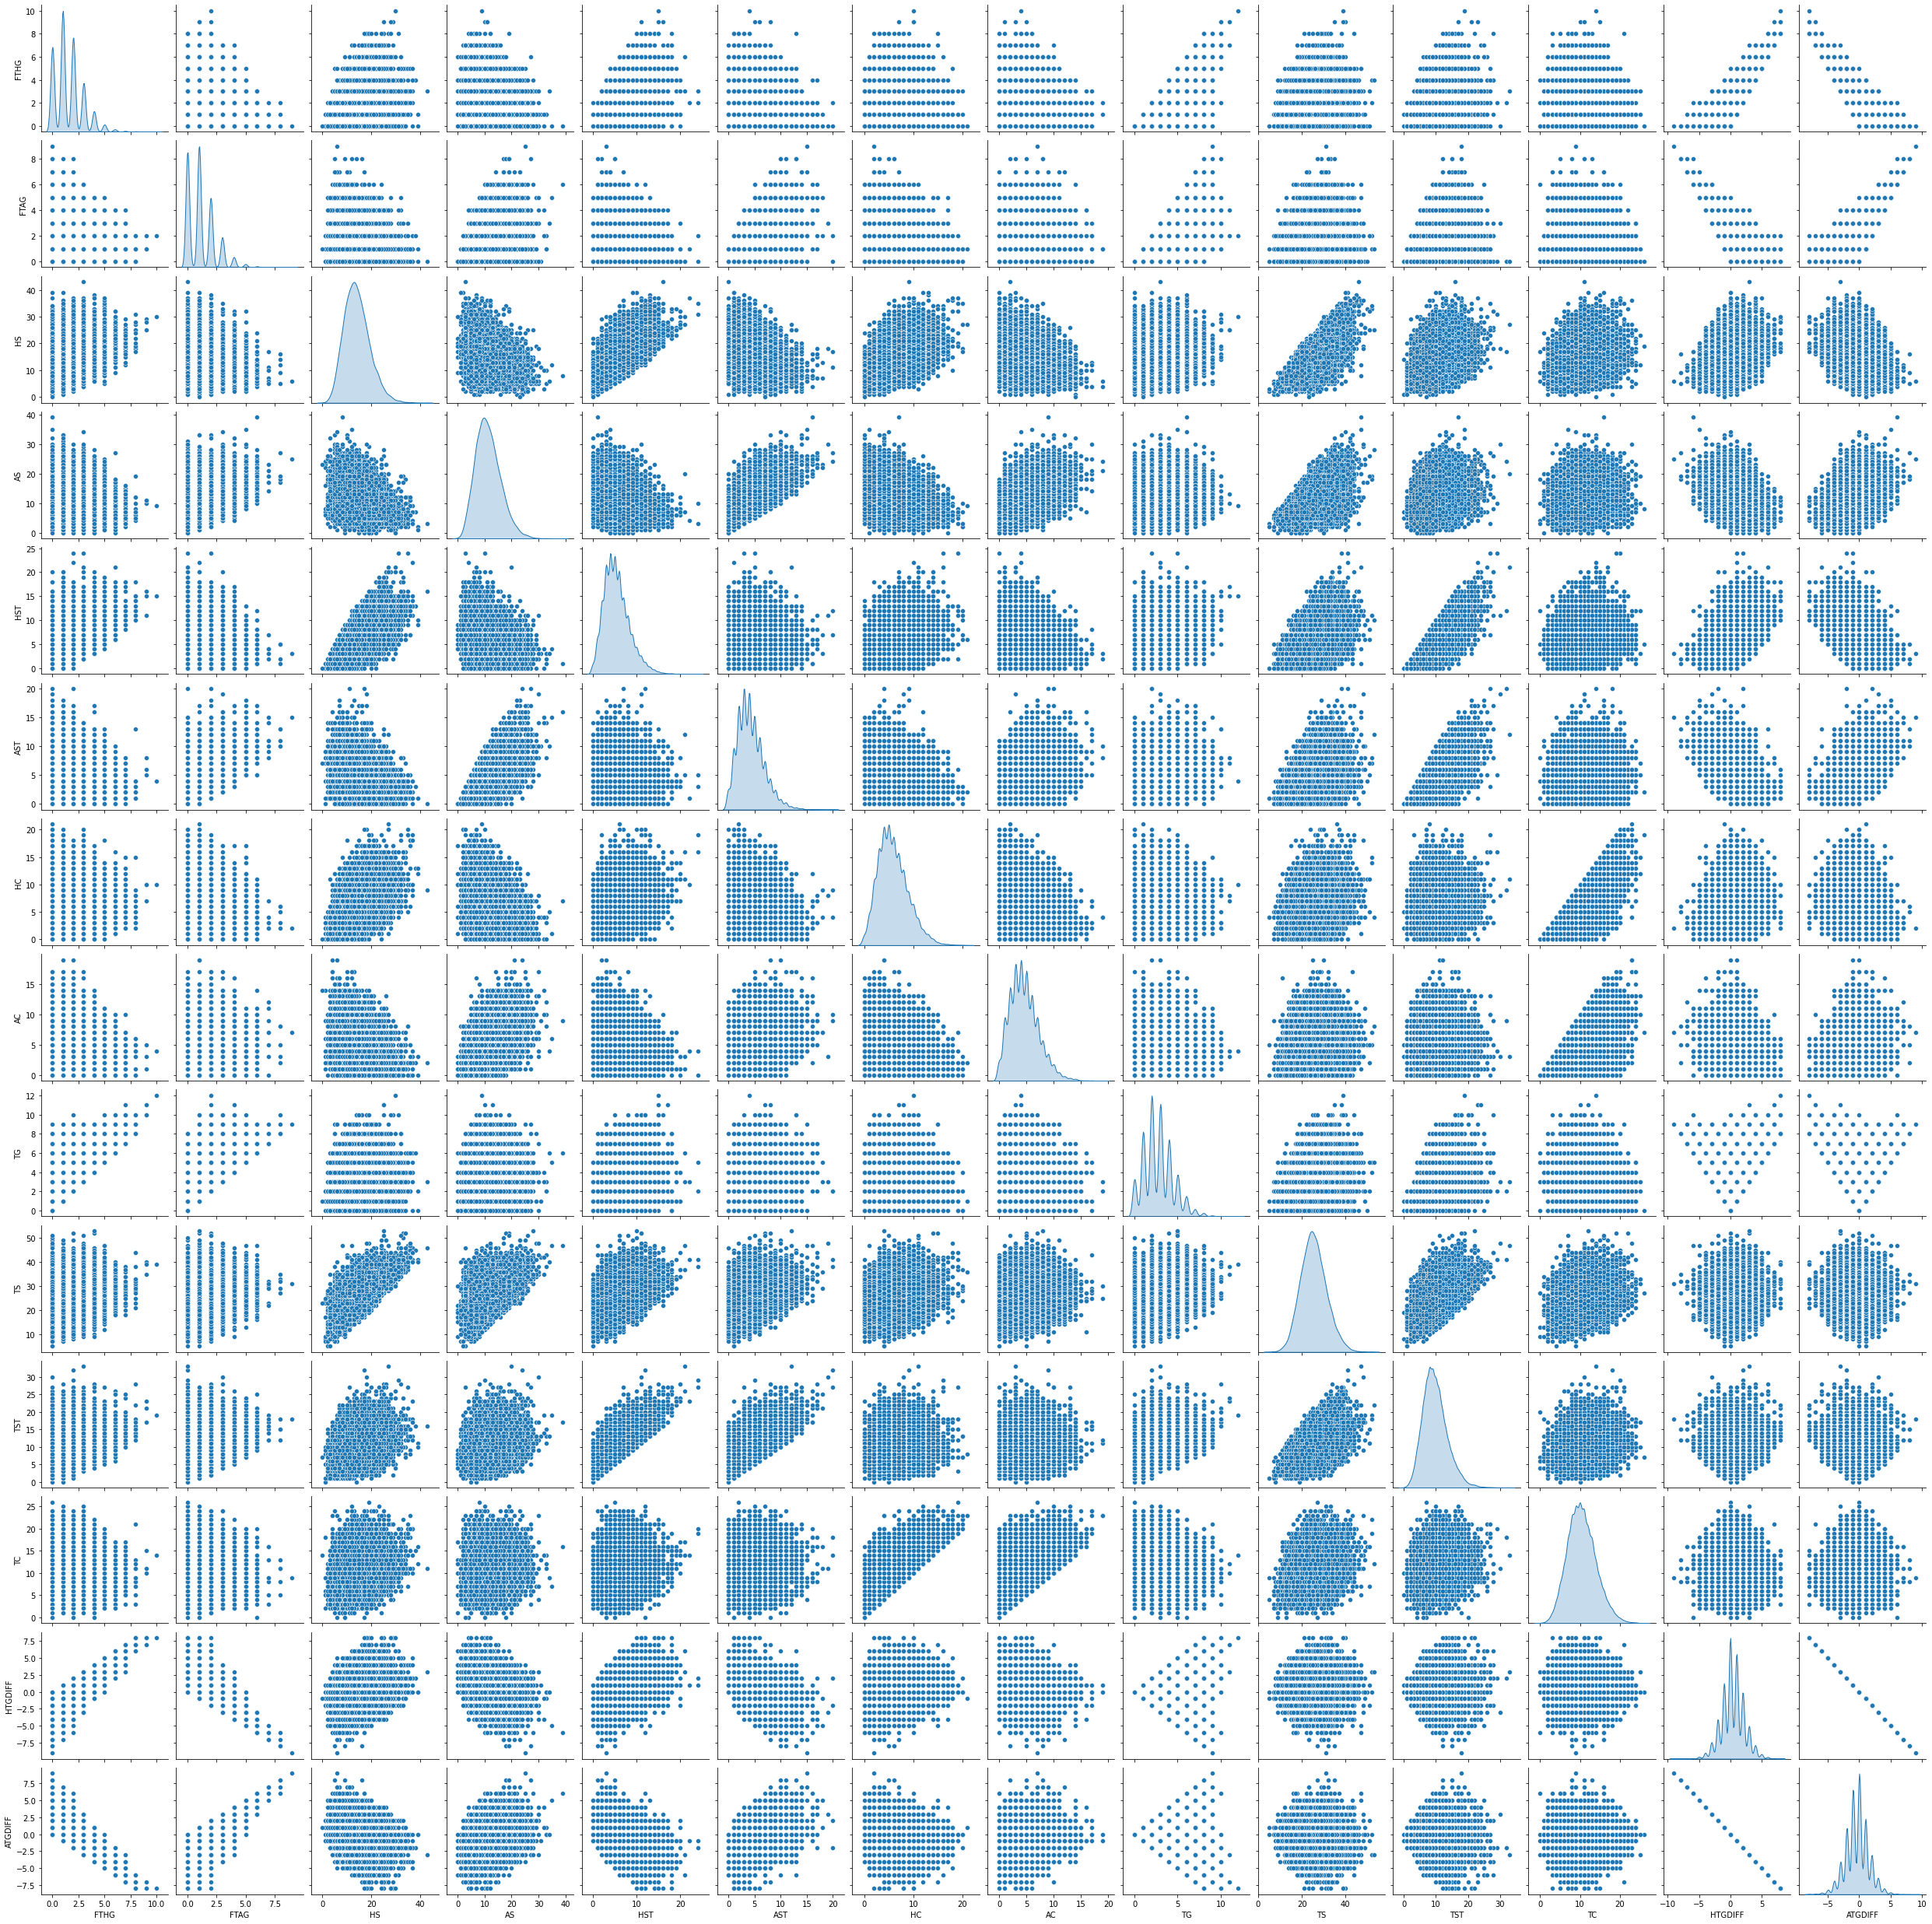

In [ ]:
sns.pairplot(data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HS','AS','HST', 'AST','HC','AC','TG','TS','TST','TC','HTGDIFF', 'ATGDIFF']], palette="bwr",diag_kind='kde')

Gráfica de goles totales por Liga: 

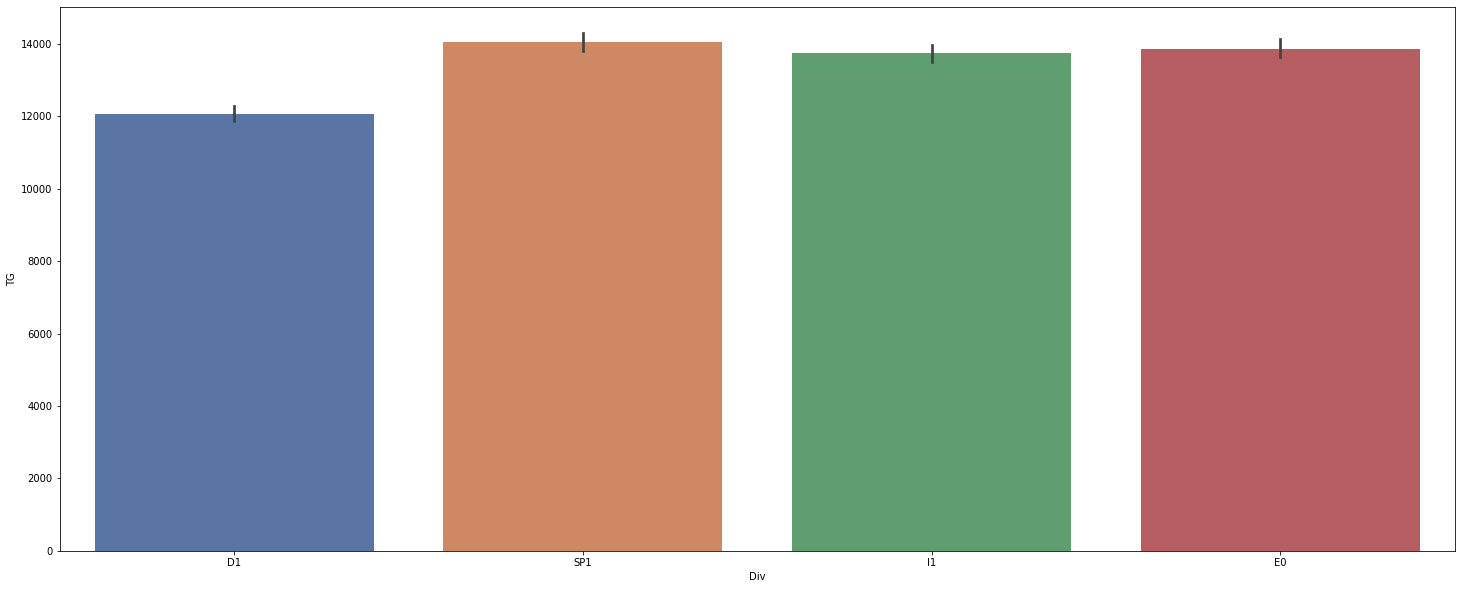

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=data, x="Div", y="TG", palette="deep", estimator=sum)

Cantidad de partidos por liga:

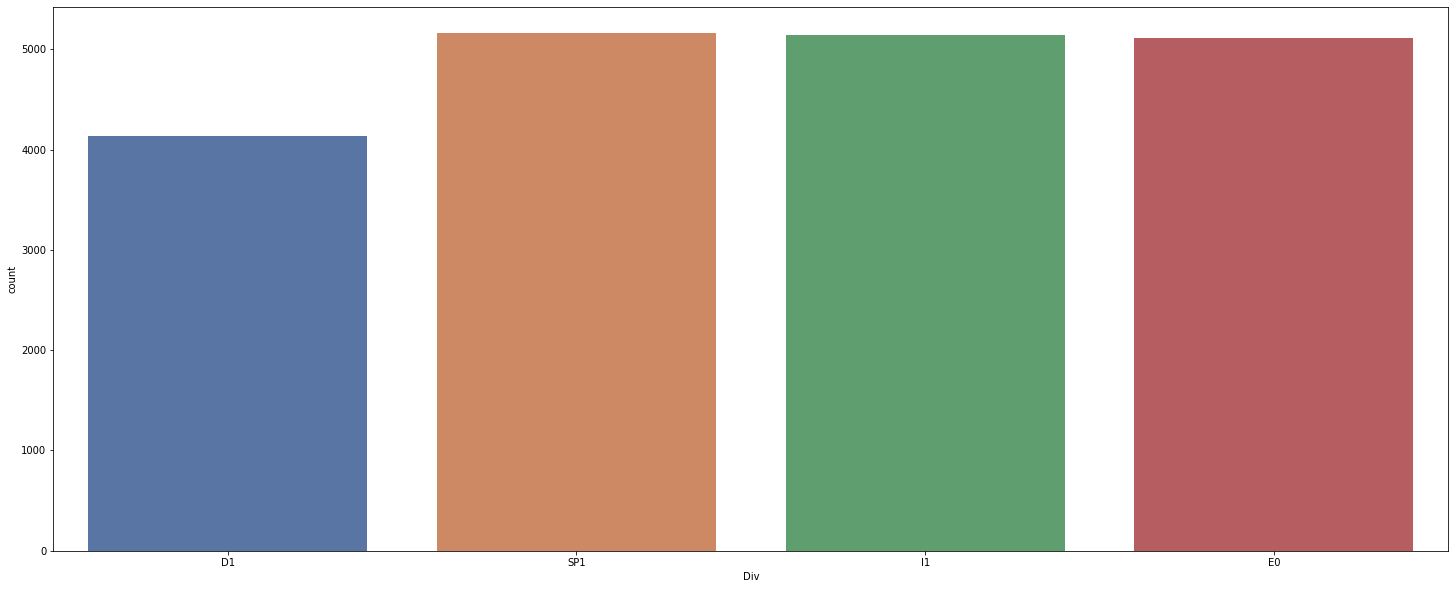

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
sns.countplot(data=data, x="Div", palette="deep")

Gráfica de Goles Promedio como local por equipo (de la liga de inglaterra 2019):

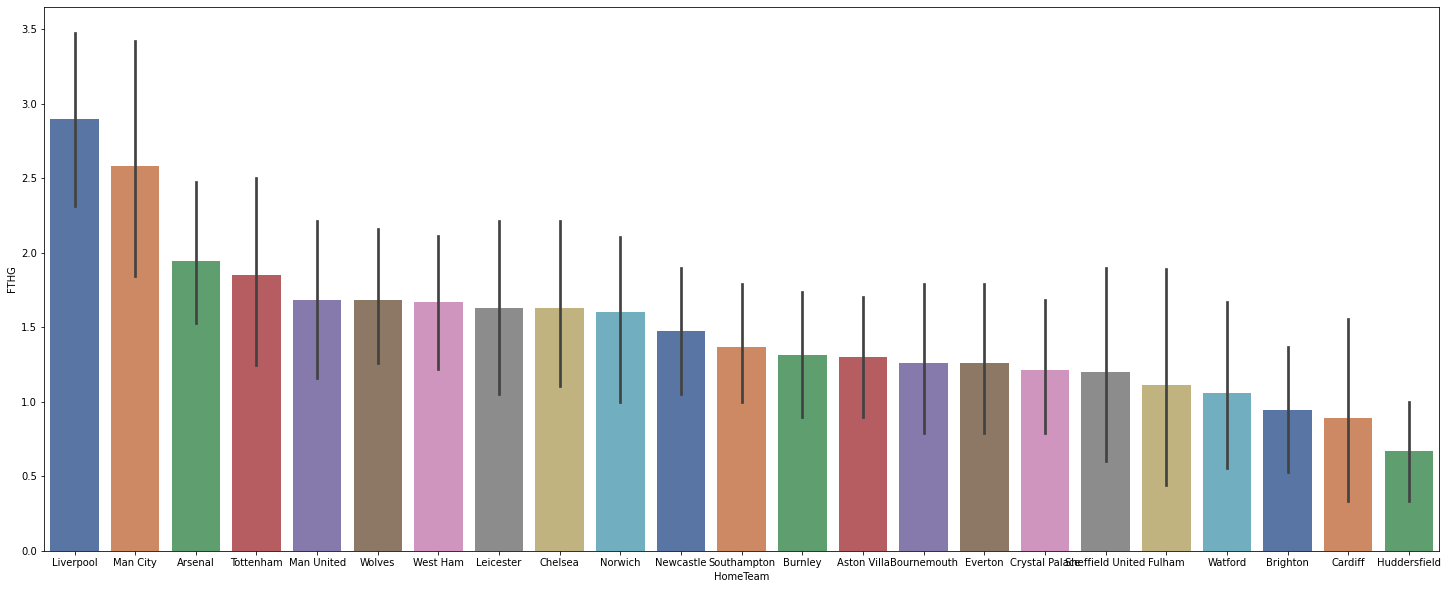

In [ ]:
Teams2019 = data[data['Div'].eq('E0') & data['Year'].eq(2019)]['HomeTeam']
OrderTeams = data[data['Div'].eq('E0') & data['HomeTeam'].eq(Teams2019)].groupby("HomeTeam")["FTHG"].mean().sort_values(ascending=False).index.values
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=data[data['Div'].eq('E0') & data['HomeTeam'].eq(Teams2019)], x="HomeTeam", y="FTHG", palette="deep", order=OrderTeams)

Gráfica de Goles Recibidos Promedio como local por equipo (de la liga de inglaterra 2019):

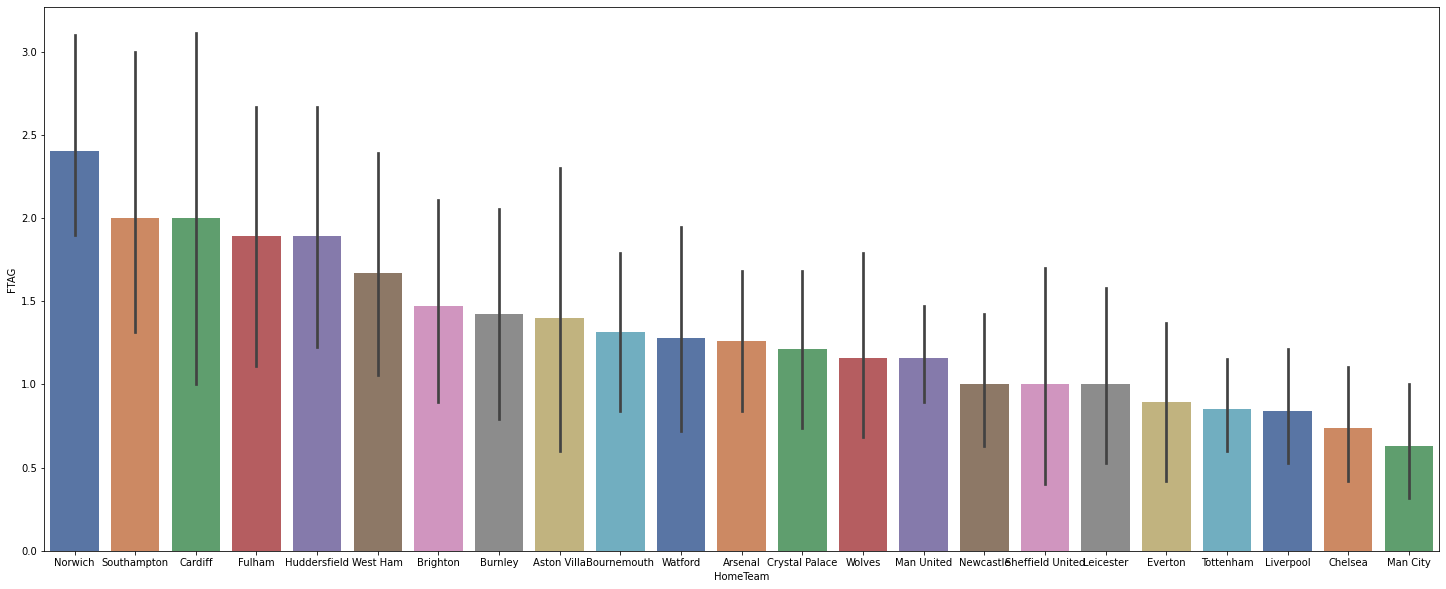

In [ ]:
Teams2019 = data[data['Div'].eq('E0') & data['Year'].eq(2019)]['HomeTeam']
OrderTeams = data[data['Div'].eq('E0') & data['HomeTeam'].eq(Teams2019)].groupby("HomeTeam")["FTAG"].mean().sort_values(ascending=False).index.values
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=data[data['Div'].eq('E0') & data['HomeTeam'].eq(Teams2019)], x="HomeTeam", y="FTAG", palette="deep", order=OrderTeams)

Gráfica de Goles Promedio como local por equipo (de la liga de españa 2019):

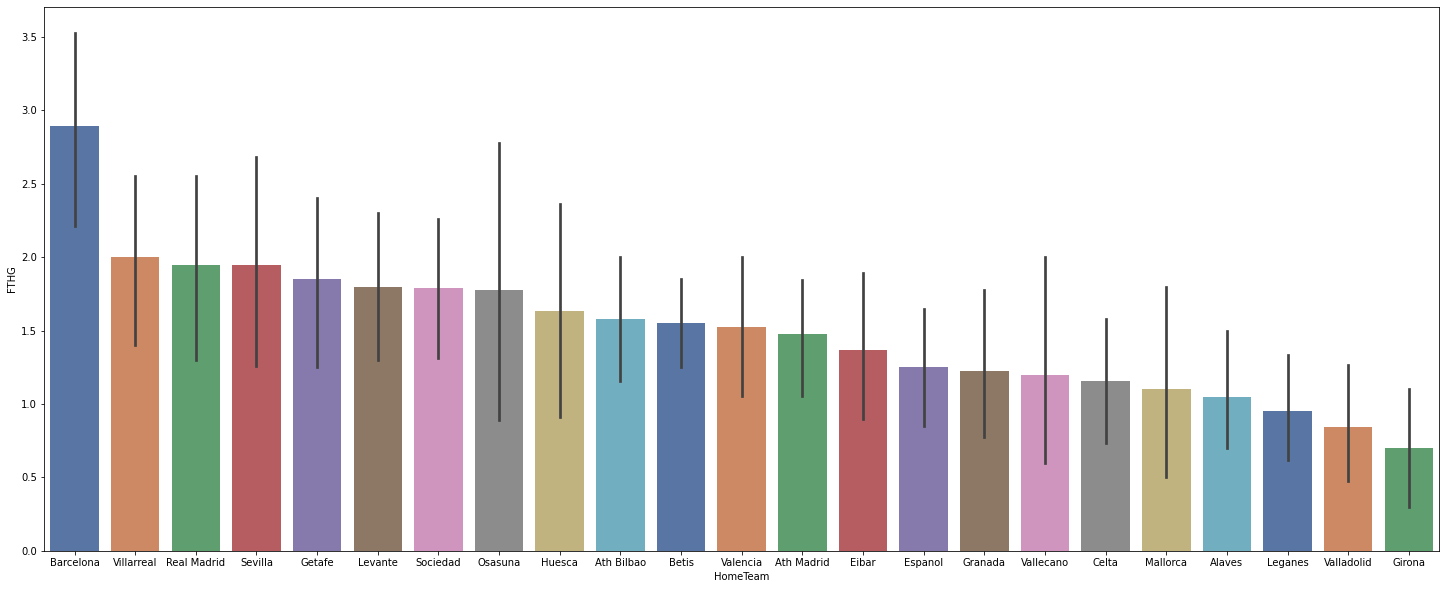

In [ ]:
Teams2019 = data[data['Div'].eq('SP1') & data['Year'].eq(2019)]['HomeTeam']
OrderTeams = data[data['Div'].eq('SP1') & data['HomeTeam'].eq(Teams2019)].groupby("HomeTeam")["FTHG"].mean().sort_values(ascending=False).index.values
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=data[data['Div'].eq('SP1') & data['HomeTeam'].eq(Teams2019)], x="HomeTeam", y="FTHG", palette="deep", order=OrderTeams)

Gráfica de Goles Promedio como local por equipo (de la liga de alemania 2019):

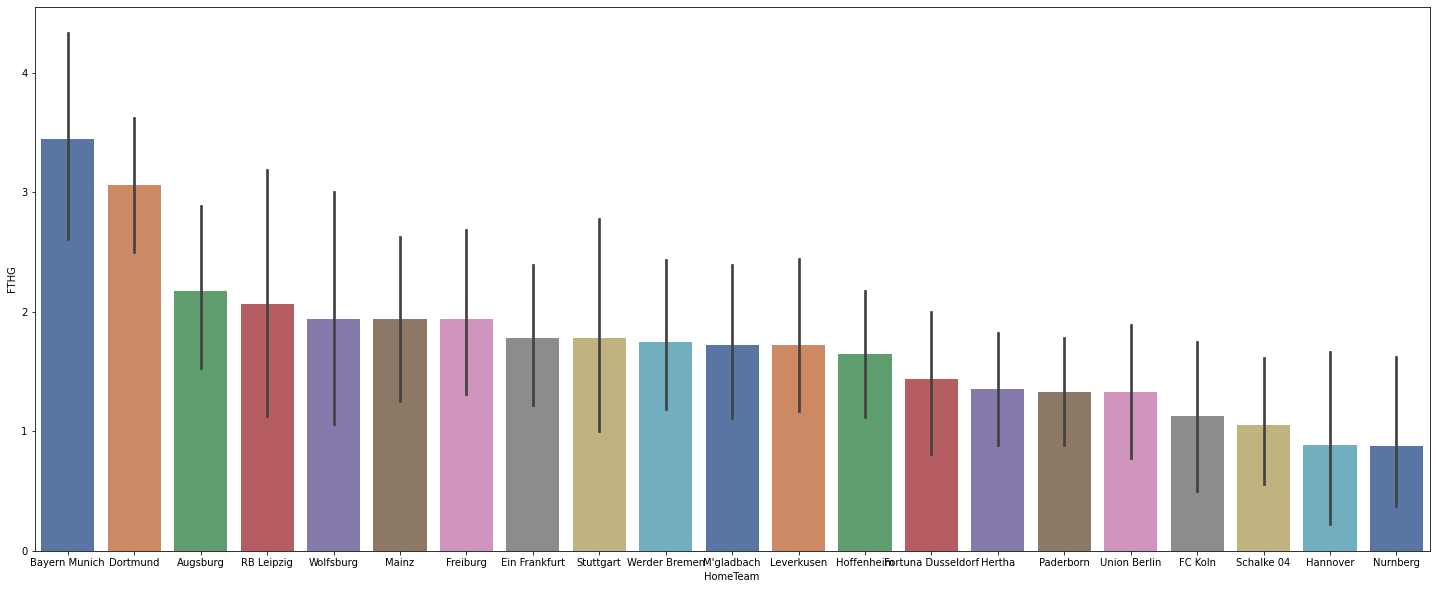

In [ ]:
Teams2019 = data[data['Div'].eq('D1') & data['Year'].eq(2019)]['HomeTeam']
OrderTeams = data[data['Div'].eq('D1') & data['HomeTeam'].eq(Teams2019)].groupby("HomeTeam")["FTHG"].mean().sort_values(ascending=False).index.values
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=data[data['Div'].eq('D1') & data['HomeTeam'].eq(Teams2019)], x="HomeTeam", y="FTHG", palette="deep", order=OrderTeams)

Gráfica de Goles Promedio como local por equipo (de la liga de italia 2019):

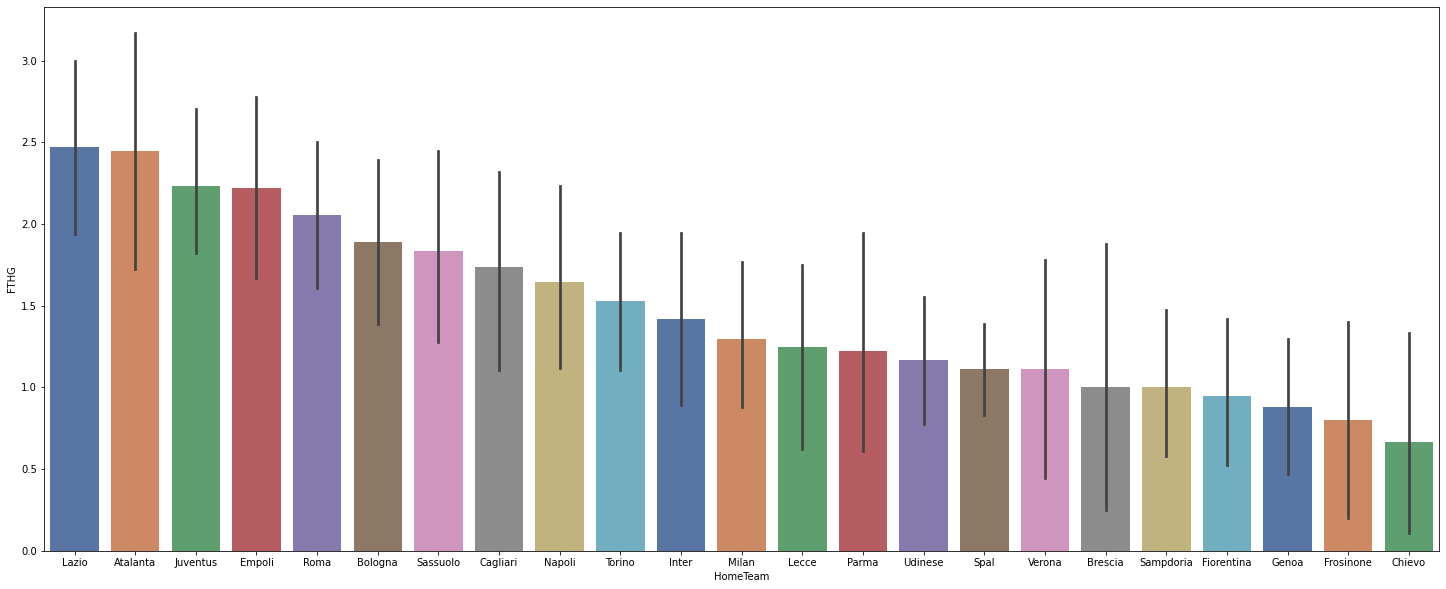

In [ ]:
Teams2019 = data[data['Div'].eq('I1') & data['Year'].eq(2019)]['HomeTeam']
OrderTeams = data[data['Div'].eq('I1') & data['HomeTeam'].eq(Teams2019)].groupby("HomeTeam")["FTHG"].mean().sort_values(ascending=False).index.values
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=data[data['Div'].eq('I1') & data['HomeTeam'].eq(Teams2019)], x="HomeTeam", y="FTHG", palette="deep", order=OrderTeams)

Se crea jointplot que muestre la relación del total de goles vs el total de tiros:

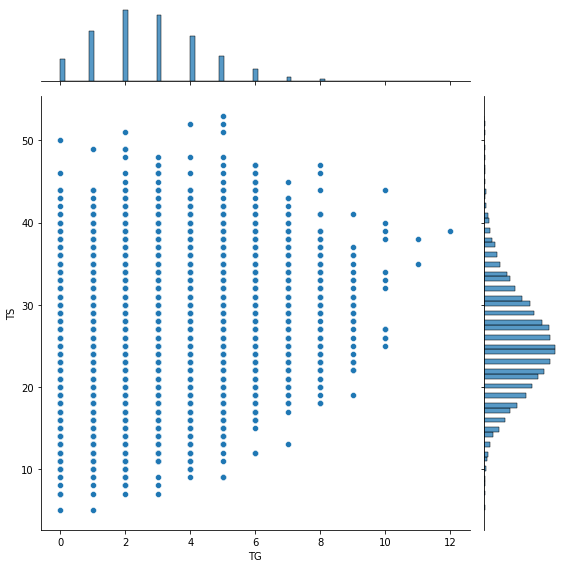

In [ ]:
sns.jointplot(data=data, x='TG', y='TS', height=8, palette="deep") 

Se explora la data (Tiros, Tiros a Puerta y Goles) de un equipo en casa a lo largo de los años:<br>
Actualmente el Manchester City es de los equipos más exitosos recientemente en Inglaterra. 

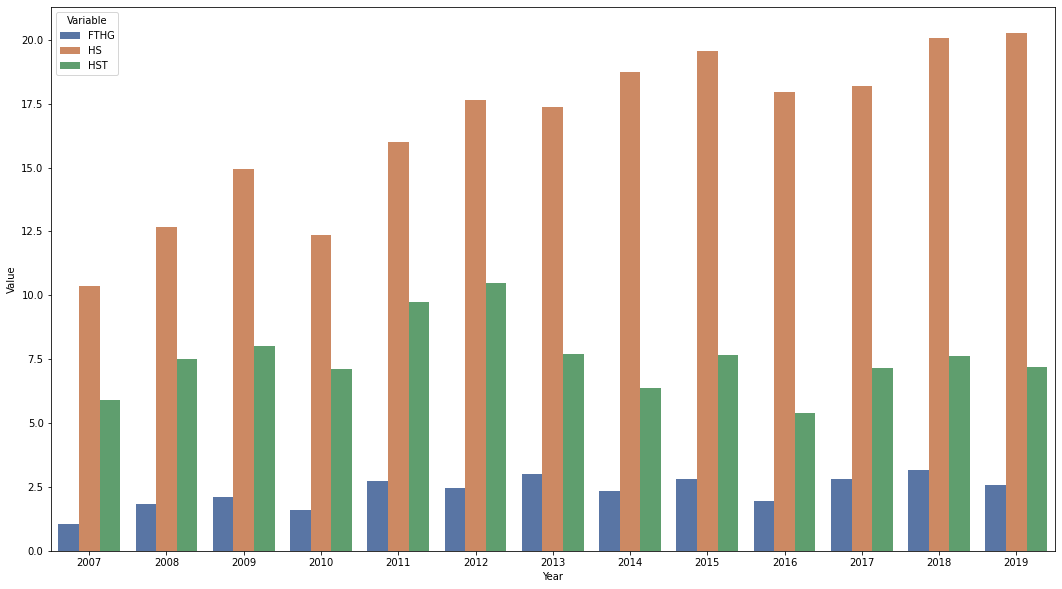

In [ ]:
ManCity = data[data['HomeTeam'].eq('Man City') & ~data['Year'].eq(2020)].groupby("Year").mean().reset_index()
f, ax = plt.subplots(figsize=(18, 10))
tidy = ManCity[['Year', 'FTHG', 'HS', 'HST']].melt(id_vars='Year').rename(columns=str.title)
sns.barplot(data=tidy, x='Year', y='Value', hue='Variable', palette="deep")

Se explora la data (Tiros, Tiros a Puerta y Goles) de un equipo en casa a lo largo de los años:<br>
Actualmente el Everton es un equipo que se mantiene en media tabla en Inglaterra, pero no ha descendido en los ultimos años. 

[(0.0, 20.0)]

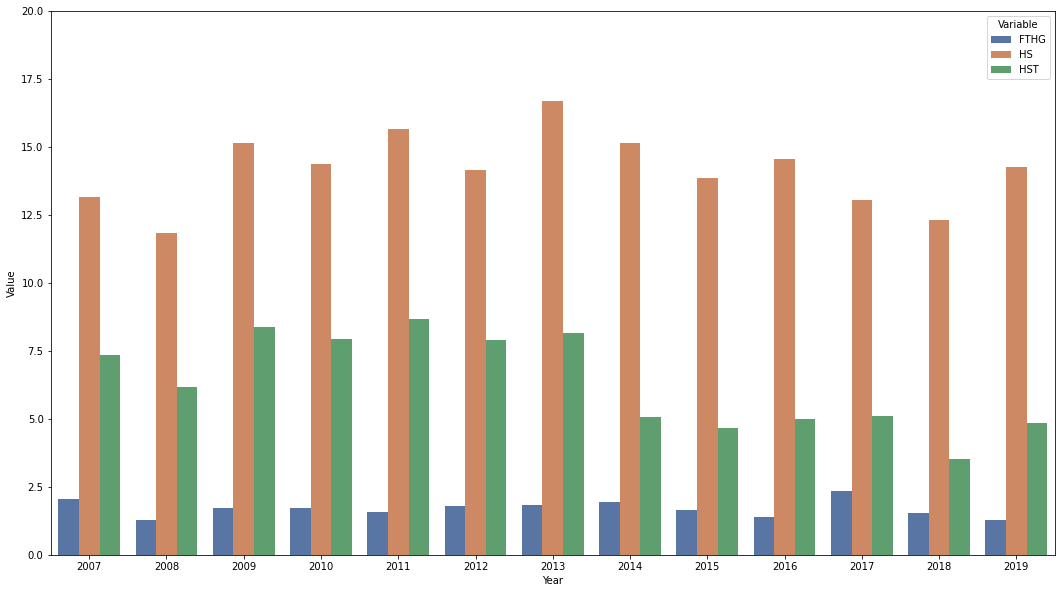

In [ ]:
Everton = data[data['HomeTeam'].eq('Everton') & ~data['Year'].eq(2020)].groupby("Year").mean().reset_index()
f, ax = plt.subplots(figsize=(18, 10))
tidy = Everton[['Year', 'FTHG', 'HS', 'HST']].melt(id_vars='Year').rename(columns=str.title)
sns.barplot(data=tidy, x='Year', y='Value', hue='Variable', palette="deep").set(ylim=(0, 20))

Gráfica de goles totales en casa vs goles totales como visitante de los equipos a lo largo de los años:

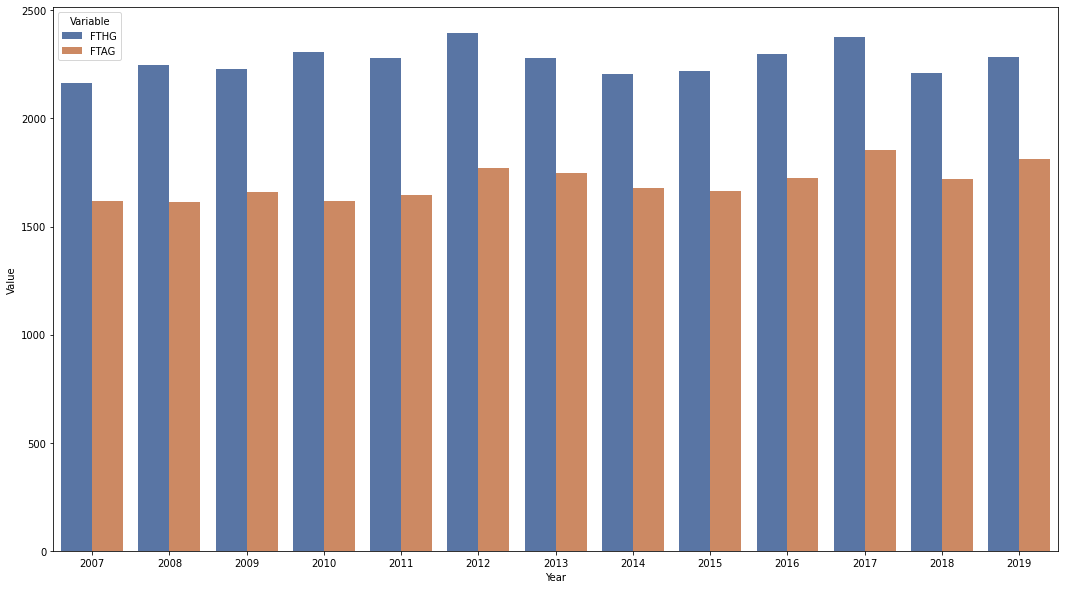

In [ ]:
teams = data[~data['Year'].eq(2020)].groupby("Year").sum().reset_index()
f, ax = plt.subplots(figsize=(18, 10))
tidy = teams[['Year', 'FTHG', 'FTAG']].melt(id_vars='Year').rename(columns=str.title)
sns.barplot(data=tidy, x='Year', y='Value', hue='Variable', palette="deep")

Se obtiene el promedio de la diferencia de goles de HomeTeam y AwayTeam y se guardan en las columnas:
*   AVGHTGDIFF: Avarage Home Team Goals Difference
*   AVGATGDIFF: Avarage Away Team Goals Difference



In [ ]:
data = avg_goal_diff(data, 'AVGHTGDIFF', 'HomeTeam', 'H')
data = avg_goal_diff(data, 'AVGATGDIFF', 'AwayTeam', 'A')

Se ordena el dataframe por fecha:

In [ ]:
data = data.sort_values(['Year', 'Month','Day'], ascending=False)

Se obtiene los goles promedio de HomeTeam y AwayTeam:

In [ ]:
data = avg_goals(data, 'AVGFTHG', 'HomeTeam', 'H')
data = avg_goals(data, 'AVGFTAG', 'AwayTeam', 'A')

Se ordena el dataframe por fecha:

In [ ]:
data = data.sort_values(['Year', 'Month','Day'], ascending=False)

Se obtiene la diferencia de goles de los últimos 6 partidos (3 como local y 3 como visitante) entre el HomeTeam y el AwayTeam:

In [ ]:
data2 = data
data = previous_data_games_between(data2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to b

Se calcula el promedio de la diferencia de los ultimos 3 partidos como local y los 3 partidos como visitante:

In [ ]:
data['AVGHT_MATCH'] = (data['HTDIFF_MATCH_1'] + data['HTDIFF_MATCH_2'] + data['HTDIFF_MATCH_3'] + data['HTDIFF_MATCH_4'] + data['HTDIFF_MATCH_5'] + data['HTDIFF_MATCH_6'] )/ 6


Se crean las los arreglos de los nomnbres de las columnas que luego serán utilizadas para el modelo: 

In [ ]:
columns_both = ['Day', 'Month', 'Year', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','TG', 'HST','HTGDIFF', 'ATGDIFF', 'AST']
columns_match = ['AVGHT_MATCH', 'HTDIFF_MATCH_1','HTDIFF_MATCH_2','HTDIFF_MATCH_3','HTDIFF_MATCH_4','HTDIFF_MATCH_5','HTDIFF_MATCH_6',
                 'ATDIFF_MATCH_1','ATDIFF_MATCH_2','ATDIFF_MATCH_3','ATDIFF_MATCH_4','ATDIFF_MATCH_5','ATDIFF_MATCH_6',]
columns_both = columns_both + columns_match
columns_HTGDIFF = [
     'AVGHTGDIFF','AVGFTHG',   'HTGDIFF_1', 'HTGDIFF_2', 'HTGDIFF_3', 'HTGDIFF_4', 'HTGDIFF_5', 'HTGDIFF_6', 'HTGDIFF_7',
    'HTGDIFF_8', 'HTGDIFF_9', 'HTGDIFF_10',   
]

columns_HST =  ['HST_1', 'HST_2', 'HST_3', 'HST_4', 'HST_5', 'HST_6', 'HST_7', 'HST_8', 'HST_9', 'HST_10']

columns_FTHG = ['FTHG_1', 'FTHG_2', 'FTHG_3', 'FTHG_4', 'FTHG_5', 'FTHG_6', 'FTHG_7', 'FTHG_8', 'FTHG_9', 'FTHG_10']
columns_home = columns_HTGDIFF + columns_FTHG


columns_ATGDIFF = [
    'AVGATGDIFF','AVGFTAG',  'ATGDIFF_1', 'ATGDIFF_2', 'ATGDIFF_3', 'ATGDIFF_4', 'ATGDIFF_5', 'ATGDIFF_6', 'ATGDIFF_7',
    'ATGDIFF_8', 'ATGDIFF_9', 'ATGDIFF_10'
]
columns_AST =  ['AST_1', 'AST_2', 'AST_3', 'AST_4', 'AST_5', 'AST_6', 'AST_7', 'AST_8', 'AST_9', 'AST_10']

columns_FTAG = ['FTAG_1', 'FTAG_2', 'FTAG_3', 'FTAG_4', 'FTAG_5', 'FTAG_6', 'FTAG_7', 'FTAG_8', 'FTAG_9', 'FTAG_10']
columns_away = columns_ATGDIFF + columns_FTAG
columns_TG = ['TG_1', 'TG_2', 'TG_3', 'TG_4', 'TG_5', 'TG_6', 'TG_7', 'TG_8', 'TG_9', 'TG_10','TG_11', 'TG_12', 'TG_13', 'TG_14', 'TG_15', 'TG_16', 'TG_17', 'TG_18', 'TG_19', 'TG_20']
columns_both = columns_both + columns_TG

Se utiliza la función previous_data() para encontrar la información anterior de los equipos en sus últimos 10 juegos

Las columnas utilizadas serán:
*   HTGDIFF: HomeTeam Goal Difference
*   ATGDIFF: AwayTeam Goal Difference
*   HST: HomeTeam Shots on Target
*   AST: AwayTeam Shots on Target
*   FTHG: Final Time HomeTeam Goals
*   FTAG: Final Time AwayTeam Goals
*   TG: Total Goals



In [ ]:
columns = columns_both + columns_HTGDIFF
previous_data_HTGDIFF = previous_data(data, 'HomeTeam', 'HTGDIFF')
previous_data_HTGDIFF = previous_data_HTGDIFF.reindex(columns=columns)
previous_data_HTGDIFF.fillna(0, inplace=True)

columns = columns + columns_ATGDIFF
previous_data_ATGDIFF = previous_data(previous_data_HTGDIFF, 'AwayTeam', 'ATGDIFF')
previous_data_ATGDIFF = previous_data_ATGDIFF.reindex(columns=columns)
previous_data_ATGDIFF.fillna(0, inplace=True)

columns = columns + columns_HST
previous_data_HST = previous_data(previous_data_ATGDIFF, 'HomeTeam', 'HST')
previous_data_HST = previous_data_HST.reindex(columns=columns)
previous_data_HST.fillna(0, inplace=True)

columns = columns + columns_AST
previous_data_AST = previous_data(previous_data_HST, 'AwayTeam', 'AST')
previous_data_AST = previous_data_AST.reindex(columns=columns)
previous_data_AST.fillna(0, inplace=True)

columns = columns + columns_FTHG
previous_data_FTHG =  previous_data(previous_data_AST, 'HomeTeam', 'FTHG')
previous_data_FTHG = previous_data_FTHG.reindex(columns=columns)
previous_data_FTHG.fillna(0, inplace=True)

columns = columns + columns_FTAG
previous_data_FTAG =  previous_data(previous_data_FTHG, 'AwayTeam', 'FTAG')
previous_data_FTAG = previous_data_FTAG.reindex(columns=columns)
previous_data_FTAG.fillna(0, inplace=True)

# columns = columns + columns_TG
previous_data_TG =  previous_data(previous_data_FTAG, 'HomeTeam', 'TG')
previous_data_TG = previous_data_TG.reindex(columns=columns)
previous_data_TG.fillna(0, inplace=True)

previous_data_TG =  previous_data(previous_data_TG, 'AwayTeam', 'TG')
previous_data_TG = previous_data_TG.reindex(columns=columns)
previous_data_TG.fillna(0, inplace=True)

previous_data = previous_data_TG


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Información de las columnas del dataset final con las nuevas columnas:<br>
Este dataset será utilizado por el modelo de Logistic Regression

In [ ]:
previous_data.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,TG,HST,HTGDIFF,ATGDIFF,AST,AVGHT_MATCH,HTDIFF_MATCH_1,HTDIFF_MATCH_2,HTDIFF_MATCH_3,HTDIFF_MATCH_4,HTDIFF_MATCH_5,HTDIFF_MATCH_6,ATDIFF_MATCH_1,ATDIFF_MATCH_2,ATDIFF_MATCH_3,ATDIFF_MATCH_4,ATDIFF_MATCH_5,ATDIFF_MATCH_6,TG_1,TG_2,TG_3,TG_4,TG_5,TG_6,TG_7,TG_8,TG_9,TG_10,TG_11,TG_12,TG_13,TG_14,TG_15,...,HST_1,HST_2,HST_3,HST_4,HST_5,HST_6,HST_7,HST_8,HST_9,HST_10,AST_1,AST_2,AST_3,AST_4,AST_5,AST_6,AST_7,AST_8,AST_9,AST_10,FTHG_1,FTHG_2,FTHG_3,FTHG_4,FTHG_5,FTHG_6,FTHG_7,FTHG_8,FTHG_9,FTHG_10,FTAG_1,FTAG_2,FTAG_3,FTAG_4,FTAG_5,FTAG_6,FTAG_7,FTAG_8,FTAG_9,FTAG_10
9265,7,12,2020,Espanol,Eibar,0.0,2.0,2.0,3.0,-2.0,2.0,6.0,-0.333333,1.0,-1.0,0.0,1.0,-3.0,0.0,-1.0,1.0,0.0,-1.0,3.0,0.0,1.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,1.0,1.0,6.0,6.0,3.0,...,5.0,4.0,5.0,7.0,6.0,7.0,7.0,6.0,3.0,2.0,1.0,1.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0
8582,25,9,2018,Espanol,Eibar,1.0,0.0,1.0,5.0,1.0,-1.0,1.0,-0.333333,-1.0,0.0,2.0,0.0,-2.0,-1.0,1.0,0.0,-2.0,0.0,2.0,1.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,1.0,6.0,6.0,3.0,1.0,...,4.0,5.0,7.0,6.0,7.0,7.0,6.0,3.0,2.0,3.0,1.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,0.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
8475,18,4,2018,Espanol,Eibar,0.0,1.0,1.0,4.0,-1.0,1.0,1.0,-0.333333,0.0,2.0,-1.0,0.0,-2.0,-1.0,0.0,-2.0,1.0,0.0,2.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,6.0,6.0,3.0,1.0,4.0,...,5.0,7.0,6.0,7.0,7.0,6.0,3.0,2.0,3.0,6.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
7853,22,10,2016,Espanol,Eibar,3.0,3.0,6.0,5.0,0.0,0.0,3.0,0.333333,2.0,-1.0,0.0,-1.0,2.0,0.0,-2.0,1.0,0.0,1.0,-2.0,0.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,4.0,3.0,...,7.0,6.0,7.0,7.0,6.0,3.0,2.0,3.0,6.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
7768,15,5,2016,Espanol,Eibar,4.0,2.0,6.0,7.0,2.0,-2.0,8.0,0.166667,-1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,-2.0,0.0,0.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,4.0,0.0,3.0,1.0,4.0,3.0,2.0,...,6.0,7.0,7.0,6.0,3.0,2.0,3.0,6.0,3.0,1.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


# Exploración del dataframe final

Se crea un histograma:

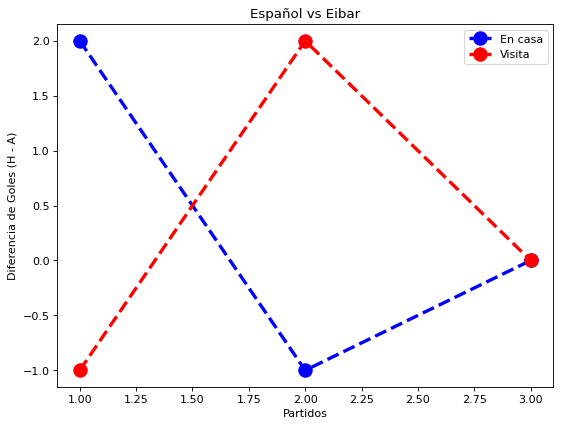

In [ ]:
# x axis values
x = [1,2,3]
plt.figure(figsize=(8, 6), dpi=80)
# plotting the points 
plt.plot(x, previous_data[0:5][['HTDIFF_MATCH_1','HTDIFF_MATCH_2','HTDIFF_MATCH_3']].values[3], color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12, label='En casa')
plt.plot(x, previous_data[0:5][['HTDIFF_MATCH_4','HTDIFF_MATCH_5','HTDIFF_MATCH_6']].values[3], color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12, label='Visita')
plt.legend()
  
# naming the x axis
plt.xlabel('Partidos')
# naming the y axis
plt.ylabel('Diferencia de Goles (H - A)')
  
# giving a title to my graph
plt.title('Español vs Eibar')
  
# function to show the plot
plt.show()

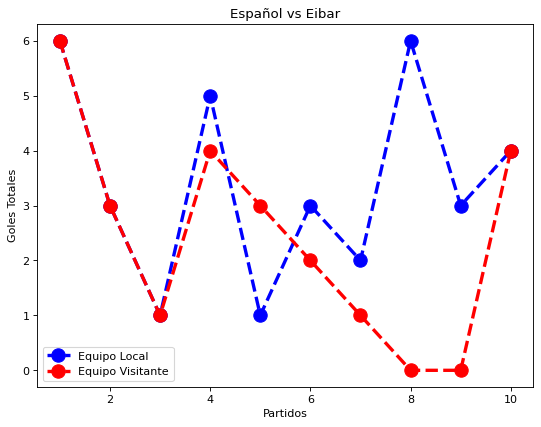

In [ ]:
# x axis values
x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(8, 6), dpi=80)
# plotting the points 
plt.plot(x, previous_data[0:5][['TG_1','TG_2','TG_3','TG_4','TG_5','TG_6','TG_7','TG_8','TG_9','TG_10']].values[3], color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12, label="Equipo Local")
plt.plot(x, previous_data[0:5][['TG_11','TG_12','TG_13','TG_14','TG_15','TG_16','TG_17','TG_18','TG_19','TG_20']].values[3], color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12, label="Equipo Visitante")
plt.legend()
  
# naming the x axis
plt.xlabel('Partidos')
# naming the y axis
plt.ylabel('Goles Totales')
  
# giving a title to my graph
plt.title('Español vs Eibar')
  
# function to show the plot
plt.show()

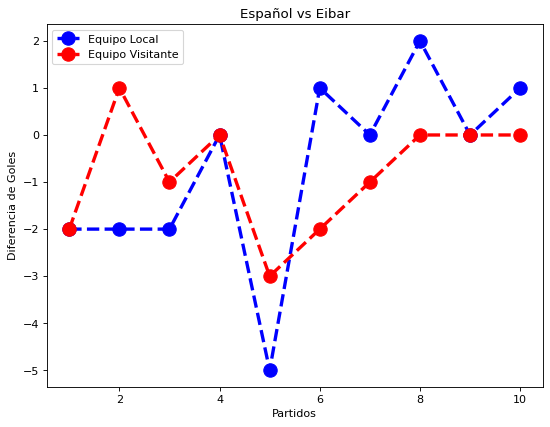

In [ ]:
# x axis values
x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(8, 6), dpi=80)
# plotting the points 
plt.plot(x, previous_data[0:5][['HTGDIFF_1','HTGDIFF_2','HTGDIFF_3','HTGDIFF_4','HTGDIFF_5','HTGDIFF_6','HTGDIFF_7','HTGDIFF_8','HTGDIFF_9','HTGDIFF_10']].values[3], color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12, label="Equipo Local")
plt.plot(x, previous_data[0:5][['ATGDIFF_1','ATGDIFF_2','ATGDIFF_3','ATGDIFF_4','ATGDIFF_5','ATGDIFF_6','ATGDIFF_7','ATGDIFF_8','ATGDIFF_9','ATGDIFF_10']].values[3], color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12, label="Equipo Visitante")
plt.legend()
  
# naming the x axis
plt.xlabel('Partidos')
# naming the y axis
plt.ylabel('Diferencia de Goles')
  
# giving a title to my graph
plt.title('Español vs Eibar')
  
# function to show the plot
plt.show()

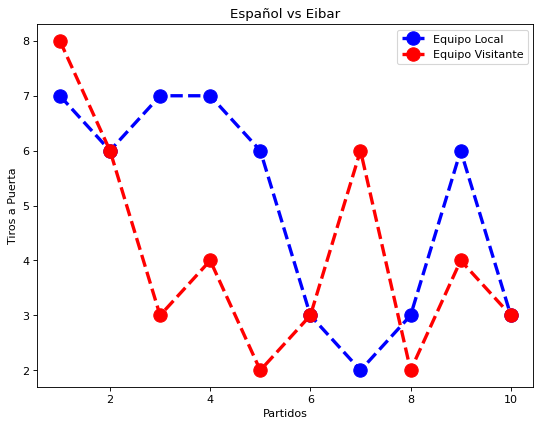

In [ ]:
# x axis values
x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(8, 6), dpi=80)
# plotting the points 
plt.plot(x, previous_data[0:5][['HST_1','HST_2','HST_3','HST_4','HST_5','HST_6','HST_7','HST_8','HST_9','HST_10']].values[3], color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12, label="Equipo Local")
plt.plot(x, previous_data[0:5][['AST_1','AST_2','AST_3','AST_4','AST_5','AST_6','AST_7','AST_8','AST_9','AST_10']].values[3], color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12, label="Equipo Visitante")
plt.legend()
  
# naming the x axis
plt.xlabel('Partidos')
# naming the y axis
plt.ylabel('Tiros a Puerta')
  
# giving a title to my graph
plt.title('Español vs Eibar')
  
# function to show the plot
plt.show()

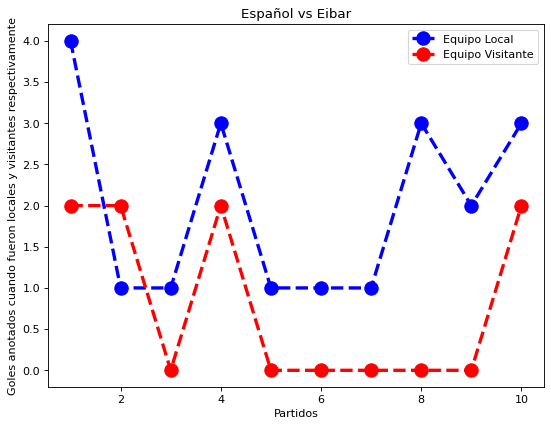

In [ ]:
# x axis values
x = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(8, 6), dpi=80)
# plotting the points 
plt.plot(x, previous_data[0:5][['FTHG_1','FTHG_2','FTHG_3','FTHG_4','FTHG_5','FTHG_6','FTHG_7','FTHG_8','FTHG_9','FTHG_10']].values[3], color='blue', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12, label="Equipo Local")
plt.plot(x, previous_data[0:5][['FTAG_1','FTAG_2','FTAG_3','FTAG_4','FTAG_5','FTAG_6','FTAG_7','FTAG_8','FTAG_9','FTAG_10']].values[3], color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=12, label="Equipo Visitante")
plt.legend()
  
# naming the x axis
plt.xlabel('Partidos')
# naming the y axis
plt.ylabel('Goles anotados cuando fueron locales y visitantes respectivamente')
  
# giving a title to my graph
plt.title('Español vs Eibar')
  
# function to show the plot
plt.show()

# Creación Modelos
En esta sección se crea el modelo que se entrenará con el dataframe generado anteriormente

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Se utiliza la función LabelEncoder() para asignarle un valor numerico a cada uno de los equipos del dataset para eliminar las variables categóricas.

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(previous_data.HomeTeam)

LabelEncoder()

Se revisa si están todos los equipos del dataset:

In [ ]:
le.classes_

array(['Aachen', 'Alaves', 'Almeria', 'Arsenal', 'Ascoli', 'Aston Villa',
       'Atalanta', 'Ath Bilbao', 'Ath Madrid', 'Augsburg', 'Barcelona',
       'Bari', 'Bayern Munich', 'Benevento', 'Betis', 'Bielefeld',
       'Birmingham', 'Blackburn', 'Blackpool', 'Bochum', 'Bologna',
       'Bolton', 'Bournemouth', 'Braunschweig', 'Brescia', 'Brighton',
       'Burnley', 'Cagliari', 'Cardiff', 'Carpi', 'Catania', 'Celta',
       'Cesena', 'Charlton', 'Chelsea', 'Chievo', 'Cordoba', 'Cottbus',
       'Crotone', 'Crystal Palace', 'Darmstadt', 'Derby', 'Dortmund',
       'Duisburg', 'Eibar', 'Ein Frankfurt', 'Elche', 'Empoli', 'Espanol',
       'Everton', 'FC Koln', 'Fiorentina', 'Fortuna Dusseldorf',
       'Freiburg', 'Frosinone', 'Fulham', 'Genoa', 'Getafe', 'Gimnastic',
       'Girona', 'Granada', 'Greuther Furth', 'Hamburg', 'Hannover',
       'Hansa Rostock', 'Hercules', 'Hertha', 'Hoffenheim',
       'Huddersfield', 'Huesca', 'Hull', 'Ingolstadt', 'Inter',
       'Juventus', 'Kaisersla

Se utiliza el mismo pbjeto generado para transformar tanto los HomeTeams y los AwayTeams para que los equipos tengan el mismo valor.

In [ ]:
home_teams_encoded = le.transform(data[['HomeTeam']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
away_teams_encoded = le.transform(data[['AwayTeam']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Se revisa si el transform() se ejecutó de manera exitosa: 

In [ ]:
home_teams_encoded

array([ 48, 119,  82, ...,  93, 145,  84])

Los equipos encoded se guardan en las columnas Home_team_encoded y Away_team_encoded: 

In [ ]:
previous_data['Home_team_encoded'] =home_teams_encoded

In [ ]:
previous_data['Away_team_encoded'] =away_teams_encoded

Se crean las variables "X" y "y" para todo el dataframe, para solo la data de HomeTeams y para solo la data de AwayTeams, de las cuales se generarán la training data y el test data: 

In [ ]:
columns_train = [item for item in (columns_home + columns_away+columns_both + ['Home_team_encoded','Away_team_encoded']) if item not in ['Day', 'Month', 'Year','HomeTeam','AwayTeam' ,'FTHG', 'FTAG','TG', 'HST','HTGDIFF', 'ATGDIFF', 'AST']]
columns_train_home = [item for item in (columns_home +columns_both + ['Home_team_encoded','Away_team_encoded']) if item not in ['Day', 'Month', 'Year','HomeTeam','AwayTeam', 'FTHG', 'FTAG','TG', 'HST','HTGDIFF', 'ATGDIFF', 'AST']]
columns_train_away = [item for item in (columns_away+columns_both + ['Home_team_encoded','Away_team_encoded']) if item not in ['Day', 'Month', 'Year','HomeTeam','AwayTeam', 'FTHG', 'FTAG','TG', 'HST','HTGDIFF', 'ATGDIFF', 'AST']]

X = previous_data[columns_train]
y = previous_data['TG']

X_home = previous_data[columns_train_home]
y_home = previous_data['FTHG']

X_away = previous_data[columns_train_away]
y_away = previous_data['FTAG']

Se utiliza train_test_split para generar X_train, X_test, y_train y y_test con un 33% del tamaño para el test: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33)

In [ ]:
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(
...     X_home, y_home, test_size=0.33)

In [ ]:
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(
...     X_away, y_away, test_size=0.33)

**Entrene y ajuste un modelo de regresión logística en el conjunto de entrenamiento.**

## Modelo de Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve


Se generann los modelos de RandomForestRegressor y se utiliza un fit() en el modelo con la training data: 

In [ ]:

rfm = RandomForestRegressor(n_estimators=10).fit(X_train, y_train)
rfm_home = RandomForestRegressor(n_estimators=10).fit(X_train_home, y_train_home)
rfm_away = RandomForestRegressor(n_estimators=10).fit(X_train_away, y_train_away)

In [ ]:
predictedY = rfm.predict(X_test)
predictedY_home = rfm_home.predict(X_test_home)
predictedY_away = rfm_away.predict(X_test_away)

In [ ]:
data_predictions = previous_data

In [ ]:
next_games_predictions_home=np.round(rfm_home.predict(np.array(previous_data[columns_train_home])),0)
data_predictions['FTHG_predicted'] = next_games_predictions_home
data_predictions.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,TG,HST,HTGDIFF,ATGDIFF,AST,AVGHT_MATCH,HTDIFF_MATCH_1,HTDIFF_MATCH_2,HTDIFF_MATCH_3,HTDIFF_MATCH_4,HTDIFF_MATCH_5,HTDIFF_MATCH_6,ATDIFF_MATCH_1,ATDIFF_MATCH_2,ATDIFF_MATCH_3,ATDIFF_MATCH_4,ATDIFF_MATCH_5,ATDIFF_MATCH_6,TG_1,TG_2,TG_3,TG_4,TG_5,TG_6,TG_7,TG_8,TG_9,TG_10,TG_11,TG_12,TG_13,TG_14,TG_15,...,HST_4,HST_5,HST_6,HST_7,HST_8,HST_9,HST_10,AST_1,AST_2,AST_3,AST_4,AST_5,AST_6,AST_7,AST_8,AST_9,AST_10,FTHG_1,FTHG_2,FTHG_3,FTHG_4,FTHG_5,FTHG_6,FTHG_7,FTHG_8,FTHG_9,FTHG_10,FTAG_1,FTAG_2,FTAG_3,FTAG_4,FTAG_5,FTAG_6,FTAG_7,FTAG_8,FTAG_9,FTAG_10,Home_team_encoded,Away_team_encoded,FTHG_predicted
9265,7,12,2020,Espanol,Eibar,0.0,2.0,2.0,3.0,-2.0,2.0,6.0,-0.333333,1.0,-1.0,0.0,1.0,-3.0,0.0,-1.0,1.0,0.0,-1.0,3.0,0.0,1.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,1.0,1.0,6.0,6.0,3.0,...,7.0,6.0,7.0,7.0,6.0,3.0,2.0,1.0,1.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,48,44,0.0
8582,25,9,2018,Espanol,Eibar,1.0,0.0,1.0,5.0,1.0,-1.0,1.0,-0.333333,-1.0,0.0,2.0,0.0,-2.0,-1.0,1.0,0.0,-2.0,0.0,2.0,1.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,1.0,6.0,6.0,3.0,1.0,...,6.0,7.0,7.0,6.0,3.0,2.0,3.0,1.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,0.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,119,89,2.0
8475,18,4,2018,Espanol,Eibar,0.0,1.0,1.0,4.0,-1.0,1.0,1.0,-0.333333,0.0,2.0,-1.0,0.0,-2.0,-1.0,0.0,-2.0,1.0,0.0,2.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,6.0,6.0,3.0,1.0,4.0,...,7.0,7.0,6.0,3.0,2.0,3.0,6.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,82,7,1.0
7853,22,10,2016,Espanol,Eibar,3.0,3.0,6.0,5.0,0.0,0.0,3.0,0.333333,2.0,-1.0,0.0,-1.0,2.0,0.0,-2.0,1.0,0.0,1.0,-2.0,0.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,4.0,3.0,...,7.0,6.0,3.0,2.0,3.0,6.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,80,136,3.0
7768,15,5,2016,Espanol,Eibar,4.0,2.0,6.0,7.0,2.0,-2.0,8.0,0.166667,-1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,-2.0,0.0,0.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,4.0,0.0,3.0,1.0,4.0,3.0,2.0,...,6.0,3.0,2.0,3.0,6.0,3.0,1.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,56,125,4.0


In [ ]:
next_games_predictions_away=np.round(rfm_away.predict(np.array(previous_data[columns_train_away])),0)
data_predictions['FTAG_predicted'] = next_games_predictions_away
data_predictions.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,TG,HST,HTGDIFF,ATGDIFF,AST,AVGHT_MATCH,HTDIFF_MATCH_1,HTDIFF_MATCH_2,HTDIFF_MATCH_3,HTDIFF_MATCH_4,HTDIFF_MATCH_5,HTDIFF_MATCH_6,ATDIFF_MATCH_1,ATDIFF_MATCH_2,ATDIFF_MATCH_3,ATDIFF_MATCH_4,ATDIFF_MATCH_5,ATDIFF_MATCH_6,TG_1,TG_2,TG_3,TG_4,TG_5,TG_6,TG_7,TG_8,TG_9,TG_10,TG_11,TG_12,TG_13,TG_14,TG_15,...,HST_5,HST_6,HST_7,HST_8,HST_9,HST_10,AST_1,AST_2,AST_3,AST_4,AST_5,AST_6,AST_7,AST_8,AST_9,AST_10,FTHG_1,FTHG_2,FTHG_3,FTHG_4,FTHG_5,FTHG_6,FTHG_7,FTHG_8,FTHG_9,FTHG_10,FTAG_1,FTAG_2,FTAG_3,FTAG_4,FTAG_5,FTAG_6,FTAG_7,FTAG_8,FTAG_9,FTAG_10,Home_team_encoded,Away_team_encoded,FTHG_predicted,FTAG_predicted
9265,7,12,2020,Espanol,Eibar,0.0,2.0,2.0,3.0,-2.0,2.0,6.0,-0.333333,1.0,-1.0,0.0,1.0,-3.0,0.0,-1.0,1.0,0.0,-1.0,3.0,0.0,1.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,1.0,1.0,6.0,6.0,3.0,...,6.0,7.0,7.0,6.0,3.0,2.0,1.0,1.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,1.0,0.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,48,44,0.0,2.0
8582,25,9,2018,Espanol,Eibar,1.0,0.0,1.0,5.0,1.0,-1.0,1.0,-0.333333,-1.0,0.0,2.0,0.0,-2.0,-1.0,1.0,0.0,-2.0,0.0,2.0,1.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,1.0,6.0,6.0,3.0,1.0,...,7.0,7.0,6.0,3.0,2.0,3.0,1.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,0.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,119,89,2.0,0.0
8475,18,4,2018,Espanol,Eibar,0.0,1.0,1.0,4.0,-1.0,1.0,1.0,-0.333333,0.0,2.0,-1.0,0.0,-2.0,-1.0,0.0,-2.0,1.0,0.0,2.0,1.0,6.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,6.0,6.0,3.0,1.0,4.0,...,7.0,6.0,3.0,2.0,3.0,6.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,82,7,1.0,1.0
7853,22,10,2016,Espanol,Eibar,3.0,3.0,6.0,5.0,0.0,0.0,3.0,0.333333,2.0,-1.0,0.0,-1.0,2.0,0.0,-2.0,1.0,0.0,1.0,-2.0,0.0,6.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,4.0,6.0,3.0,1.0,4.0,3.0,...,6.0,3.0,2.0,3.0,6.0,3.0,8.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,80,136,3.0,1.0
7768,15,5,2016,Espanol,Eibar,4.0,2.0,6.0,7.0,2.0,-2.0,8.0,0.166667,-1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,-2.0,0.0,0.0,3.0,1.0,5.0,1.0,3.0,2.0,6.0,3.0,4.0,0.0,3.0,1.0,4.0,3.0,2.0,...,3.0,2.0,3.0,6.0,3.0,1.0,6.0,3.0,4.0,2.0,3.0,6.0,2.0,4.0,3.0,4.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,56,125,4.0,1.0


Se grafica el arbol enerado en el modelo: 

In [ ]:
from sklearn.tree import export_graphviz
import pydot
tree_4   =  rfm_home.estimators_[7]

# use export_graphviz to save the tree as a dot file first as indicated: 
# as described here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
export_graphviz(tree_4, out_file = 'tree_4_home.dot', feature_names = columns_train_home, rounded = True, precision = 1)

# then use the dot file to create a png file 
(graph, ) = pydot.graph_from_dot_file('tree_4_home.dot')
graph.write_png('tree_4_home.png');

Classification Report de Modelo incluyendo la información de los equipos en casa y visitantes: 

In [ ]:
classReportRfm = classification_report(np.array([tg>1.5 for tg in y_test.tolist()]), np.array([tg>1.5 for tg in predictedY.tolist()]))
print(classReportRfm)

              precision    recall  f1-score   support

       False       0.38      0.07      0.12      1547
        True       0.77      0.96      0.85      4903

    accuracy                           0.75      6450
   macro avg       0.58      0.52      0.49      6450
weighted avg       0.68      0.75      0.68      6450



Classification Report de Modelo solo con la información de los equipos en casa: 

In [ ]:
classReportRfm = classification_report(np.array([FTHG>1.5 for FTHG in y_test_home.tolist()]), np.array([FTHG>1.5 for FTHG in predictedY_home.tolist()]))
print(classReportRfm)

              precision    recall  f1-score   support

       False       0.66      0.65      0.65      3468
        True       0.60      0.61      0.61      2982

    accuracy                           0.63      6450
   macro avg       0.63      0.63      0.63      6450
weighted avg       0.63      0.63      0.63      6450



Classification Report de Modelo solo con la información de los equipos cuando jugaron como visitantes: 

In [ ]:
classReportRfm = classification_report(np.array([FTAG>1.5 for FTAG in y_test_away.tolist()]), np.array([FTAG>1.5 for FTAG in predictedY_away.tolist()]))
print(classReportRfm)

              precision    recall  f1-score   support

       False       0.70      0.81      0.75      4316
        True       0.44      0.30      0.35      2134

    accuracy                           0.64      6450
   macro avg       0.57      0.55      0.55      6450
weighted avg       0.61      0.64      0.62      6450



ROC/AUC del modelo incluyendo la información de los equipos en casa y visitantes:

In [ ]:
roc_auc_score(np.array([tg>1.5 for tg in y_test.tolist()]), np.array([tg>1.5 for tg in predictedY.tolist()]))

0.5180642143426033

ROC/AUC del modelo incluyendo la información de los equipos en casa:

In [ ]:
roc_auc_score(np.array([tg>1.5 for tg in y_test_home.tolist()]), np.array([tg>1.5 for tg in predictedY_home.tolist()]))

0.6297232646165343

ROC/AUC del modelo incluyendo la información de los equipos visitantes:

In [ ]:
roc_auc_score(np.array([tg>1.5 for tg in y_test_away.tolist()]), np.array([tg>1.5 for tg in predictedY_away.tolist()]))

0.5542548682220773

La matriz de confusión:<br> 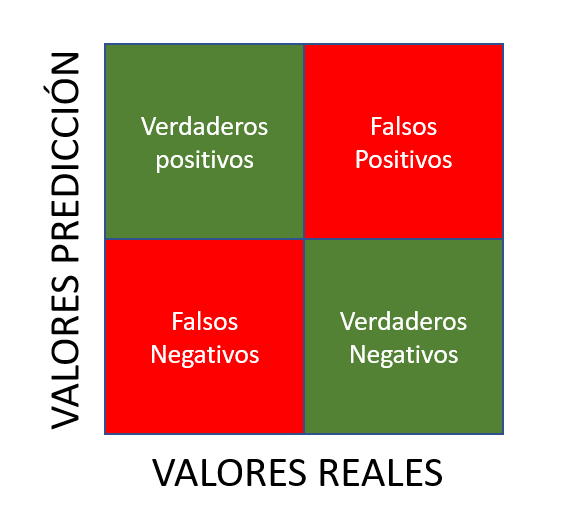

Matriz de Confusión del modelo con la informción de los equipos en casa y visitantes:

In [ ]:
confMatrixRfm = confusion_matrix([tg>1.5 for tg in y_test.tolist()], [tg>1.5 for tg in predictedY.tolist()], labels=[True, False])
print(confMatrixRfm)

[[4722  181]
 [1434  113]]


Matriz de Confusión del modelo con la informción de los equipos en casa:

In [ ]:
confMatrixRfm_home = confusion_matrix([FTHG>1.5 for FTHG in y_test_home.tolist()], [FTHG>1.5 for FTHG in predictedY_home.tolist()], labels=[True, False])
print(confMatrixRfm_home)

[[1827 1155]
 [1225 2243]]


Matriz de Confusión del modelo con la informción de los equipos visitantes:

In [ ]:
confMatrixRfm_away = confusion_matrix([FTAG>1.5 for FTAG in y_test_away.tolist()], [FTAG>1.5 for FTAG in predictedY_away.tolist()], labels=[True, False])
print(confMatrixRfm_away)

[[ 637 1497]
 [ 820 3496]]


In [ ]:
errors = abs(abs(np.round(rfm.predict(X_test),0)) - y_test)
accuracy = (errors==0).sum() / len(errors) * 100

print('Media de goles predichos del partido:', round(np.mean(errors),2))
print('Accuracy de predecir exactamente los goles del partido:', round(accuracy, 2), '%.')    

Media de goles predichos del partido: 1.33
Accuracy de predecir exactamente los goles del partido: 23.35 %.


In [ ]:
errors = abs(abs(np.round(rfm_home.predict(X_test_home),0)) - y_test_home)
accuracy = (errors==0).sum() / len(errors) * 100

print('Media de goles predichos del equipo de casa:', round(np.mean(errors),2))
print('Accuracy de predecir exactamente los goles del equipo de casa:', round(accuracy, 2), '%.') 

Media de goles predichos del equipo de casa: 0.93
Accuracy de predecir exactamente los goles del equipo de casa: 32.12 %.


In [ ]:
errors = abs(abs(np.round(rfm_away.predict(X_test_away),0)) - y_test_away)
accuracy = (errors==0).sum() / len(errors) * 100

print('Media de goles predichos del equipo visitantes:', round(np.mean(errors),2))
print('Accuracy de predeceir exactamente los goles del equipo visitante:', round(accuracy, 2), '%.') 

Media de goles predichos del equipo visitantes: 0.92
Accuracy de predeceir exactamente los goles del equipo visitante: 31.36 %.


Se revisan las importancias de cada una de las variables del modelo: 

In [ ]:
importance = np.round(rfm_home.feature_importances_,4)
dictionary = dict(zip(columns_train_home, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:15} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: AVGFTHG         20.84%
Feature Importance: Away_team_encoded 3.42%
Feature Importance: Home_team_encoded 3.39%
Feature Importance: AVGHT_MATCH     2.77%
Feature Importance: AVGHTGDIFF      2.68%
Feature Importance: HTGDIFF_3       2.29%
Feature Importance: HTGDIFF_2       2.21%
Feature Importance: HTGDIFF_7       2.12%
Feature Importance: HTGDIFF_1       2.11%
Feature Importance: HTGDIFF_6       2.11%
Feature Importance: HTGDIFF_8       2.03%
Feature Importance: HTGDIFF_5       1.99%
Feature Importance: HTGDIFF_9       1.87%
Feature Importance: HTGDIFF_4       1.79%
Feature Importance: TG_6            1.78%
Feature Importance: TG_19           1.75%
Feature Importance: HTGDIFF_10      1.66%
Feature Importance: TG_16           1.6%
Feature Importance: TG_20           1.58%
Feature Importance: TG_15           1.55%
Feature Importance: TG_13           1.52%
Feature Importance: TG_18           1.52%
Feature Importance: TG_8            1.48%
Feature Importance: TG_10     

Se guardan los datos de predicción en el dataset para comparlos:

In [ ]:
# create predicted goal differences subtracting predicted home and away goals from each other and vice vers
data_predictions['HTGDIFF_predicted'] = data_predictions['FTHG_predicted'] - data_predictions['FTAG_predicted']
data_predictions['ATGDIFF_predicted'] = data_predictions['FTAG_predicted'] - data_predictions['FTHG_predicted']
data_predictions['TG_predicted'] = data_predictions['FTHG_predicted'] + data_predictions['FTAG_predicted']

Resultados de la predicción del resultado final de un partido:

In [ ]:
total_wins=(data_predictions["HTGDIFF_predicted"] > 0).sum()
total_draw=(data_predictions["HTGDIFF_predicted"] == 0).sum()
total_loss=(data_predictions["HTGDIFF_predicted"] < 0).sum()

common_win = ((data_predictions["HTGDIFF"] > 0) & (data_predictions["HTGDIFF_predicted"] > 0)).sum()
common_draw = ((data_predictions["HTGDIFF"] == 0) & (data_predictions["HTGDIFF_predicted"] == 0)).sum()
common_lost = ((data_predictions["HTGDIFF"] < 0) & (data_predictions["HTGDIFF_predicted"] < 0)).sum()

print('Accuracy de la predicción del resultado final: {} %'.format(np.round(((common_win+common_draw+common_lost)/data_predictions.shape[0]) * 100,2)))

Accuracy de la predicción del resultado final: 67.44 %


Matriz de confusión de resultados finales:

In [ ]:
confMatrixRfm = confusion_matrix(['H' if tg > 0 else 'D' if tg == 0 else 'A' for tg in data_predictions["HTGDIFF"]], ['H' if tg > 0 else 'D' if tg == 0 else 'A' for tg in data_predictions["HTGDIFF_predicted"]], labels=['H', 'D', 'A'])
print(confMatrixRfm)

[[7060 1695  304]
 [1433 2525  891]
 [ 481 1559 3595]]


Classification Report de Modelo para predecir resultados finales: 

In [ ]:
classReportRfm = classification_report(['H' if tg > 0 else 'D' if tg == 0 else 'A' for tg in data_predictions["HTGDIFF"]], ['H' if tg > 0 else 'D' if tg == 0 else 'A' for tg in data_predictions["HTGDIFF_predicted"]])
print(classReportRfm)

              precision    recall  f1-score   support

           A       0.75      0.64      0.69      5635
           D       0.44      0.52      0.48      4849
           H       0.79      0.78      0.78      9059

    accuracy                           0.67     19543
   macro avg       0.66      0.65      0.65     19543
weighted avg       0.69      0.67      0.68     19543



ROC/AUC Predecir Ganar vs todas las demás opciones:

In [ ]:
roc_auc_score([True if tg > 0 else False for tg in data_predictions["HTGDIFF"]], [True if tg > 0 else False for tg in data_predictions["HTGDIFF_predicted"]])

0.8283857802925659

ROC/AUC Predecir Empatar vs todas las demás opciones:

In [ ]:
roc_auc_score([True if tg == 0 else False for tg in data_predictions["HTGDIFF"]], [True if tg == 0 else False for tg in data_predictions["HTGDIFF_predicted"]])

0.6796374952586768

ROC/AUC Predecir Perder vs todas las demás opciones:

In [ ]:
roc_auc_score([True if tg < 0 else False for tg in data_predictions["HTGDIFF"]], [True if tg < 0 else False for tg in data_predictions["HTGDIFF_predicted"]])

0.8060275791300877

Resultados de la predicción de total de goles por partido:

In [ ]:
common_goals_above = ((data_predictions["TG"] > 1.5) & (data_predictions["TG_predicted"] >1.5)).sum()
print('Accuracy de la predicción de que el partido tenga más de 1.5 goles: {} %'.format(np.round(((common_goals_above)/data_predictions.shape[0]) * 100,2)))

Accuracy de la predicción de que el partido tenga más de 1.5 goles: 73.31 %
